In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

sns.set_theme()
sns.set_palette("colorblind")

In [3]:
path = "results_model"

In [5]:
# Correlation pandas
df = pd.read_csv(os.path.join(path, "Correlation_results.csv"))

# TF predictions
TF_predictions = np.load(os.path.join(path, "Predicted.csv.npy"))

# TF true values
TF_true = np.load(os.path.join(path, "Target.csv.npy"))

# Freq
freq = np.genfromtxt(os.path.join(path, "TTF_freq_200.csv"), delimiter=",")

In [6]:
df.iloc[0]

Vs_soil         236.421480
Vs_bedrock     1246.805300
h_soil          130.000000
correlation       0.503246
Name: 0, dtype: float64

In [7]:
def text_plot(df_row):
    # Eliminate the nan at the end of the array
    vs_soil = df_row[0]
    h_soil = df_row[2]
    vs_bedrock = df_row[1]
    freq = vs_soil/(4*(h_soil+5))
    correlation = df_row[3]
    return f"Vs soil: {vs_soil:.0f} m/s, Vs bedrock: {vs_bedrock:.0f} m/s\nh soil: {h_soil} m\nfreq_calc: {vs_soil/(4*(h_soil+5)):.2f} Hz, $\\rho$: {correlation:.2f}"

In [8]:
df.iloc[0]

Vs_soil         236.421480
Vs_bedrock     1246.805300
h_soil          130.000000
correlation       0.503246
Name: 0, dtype: float64

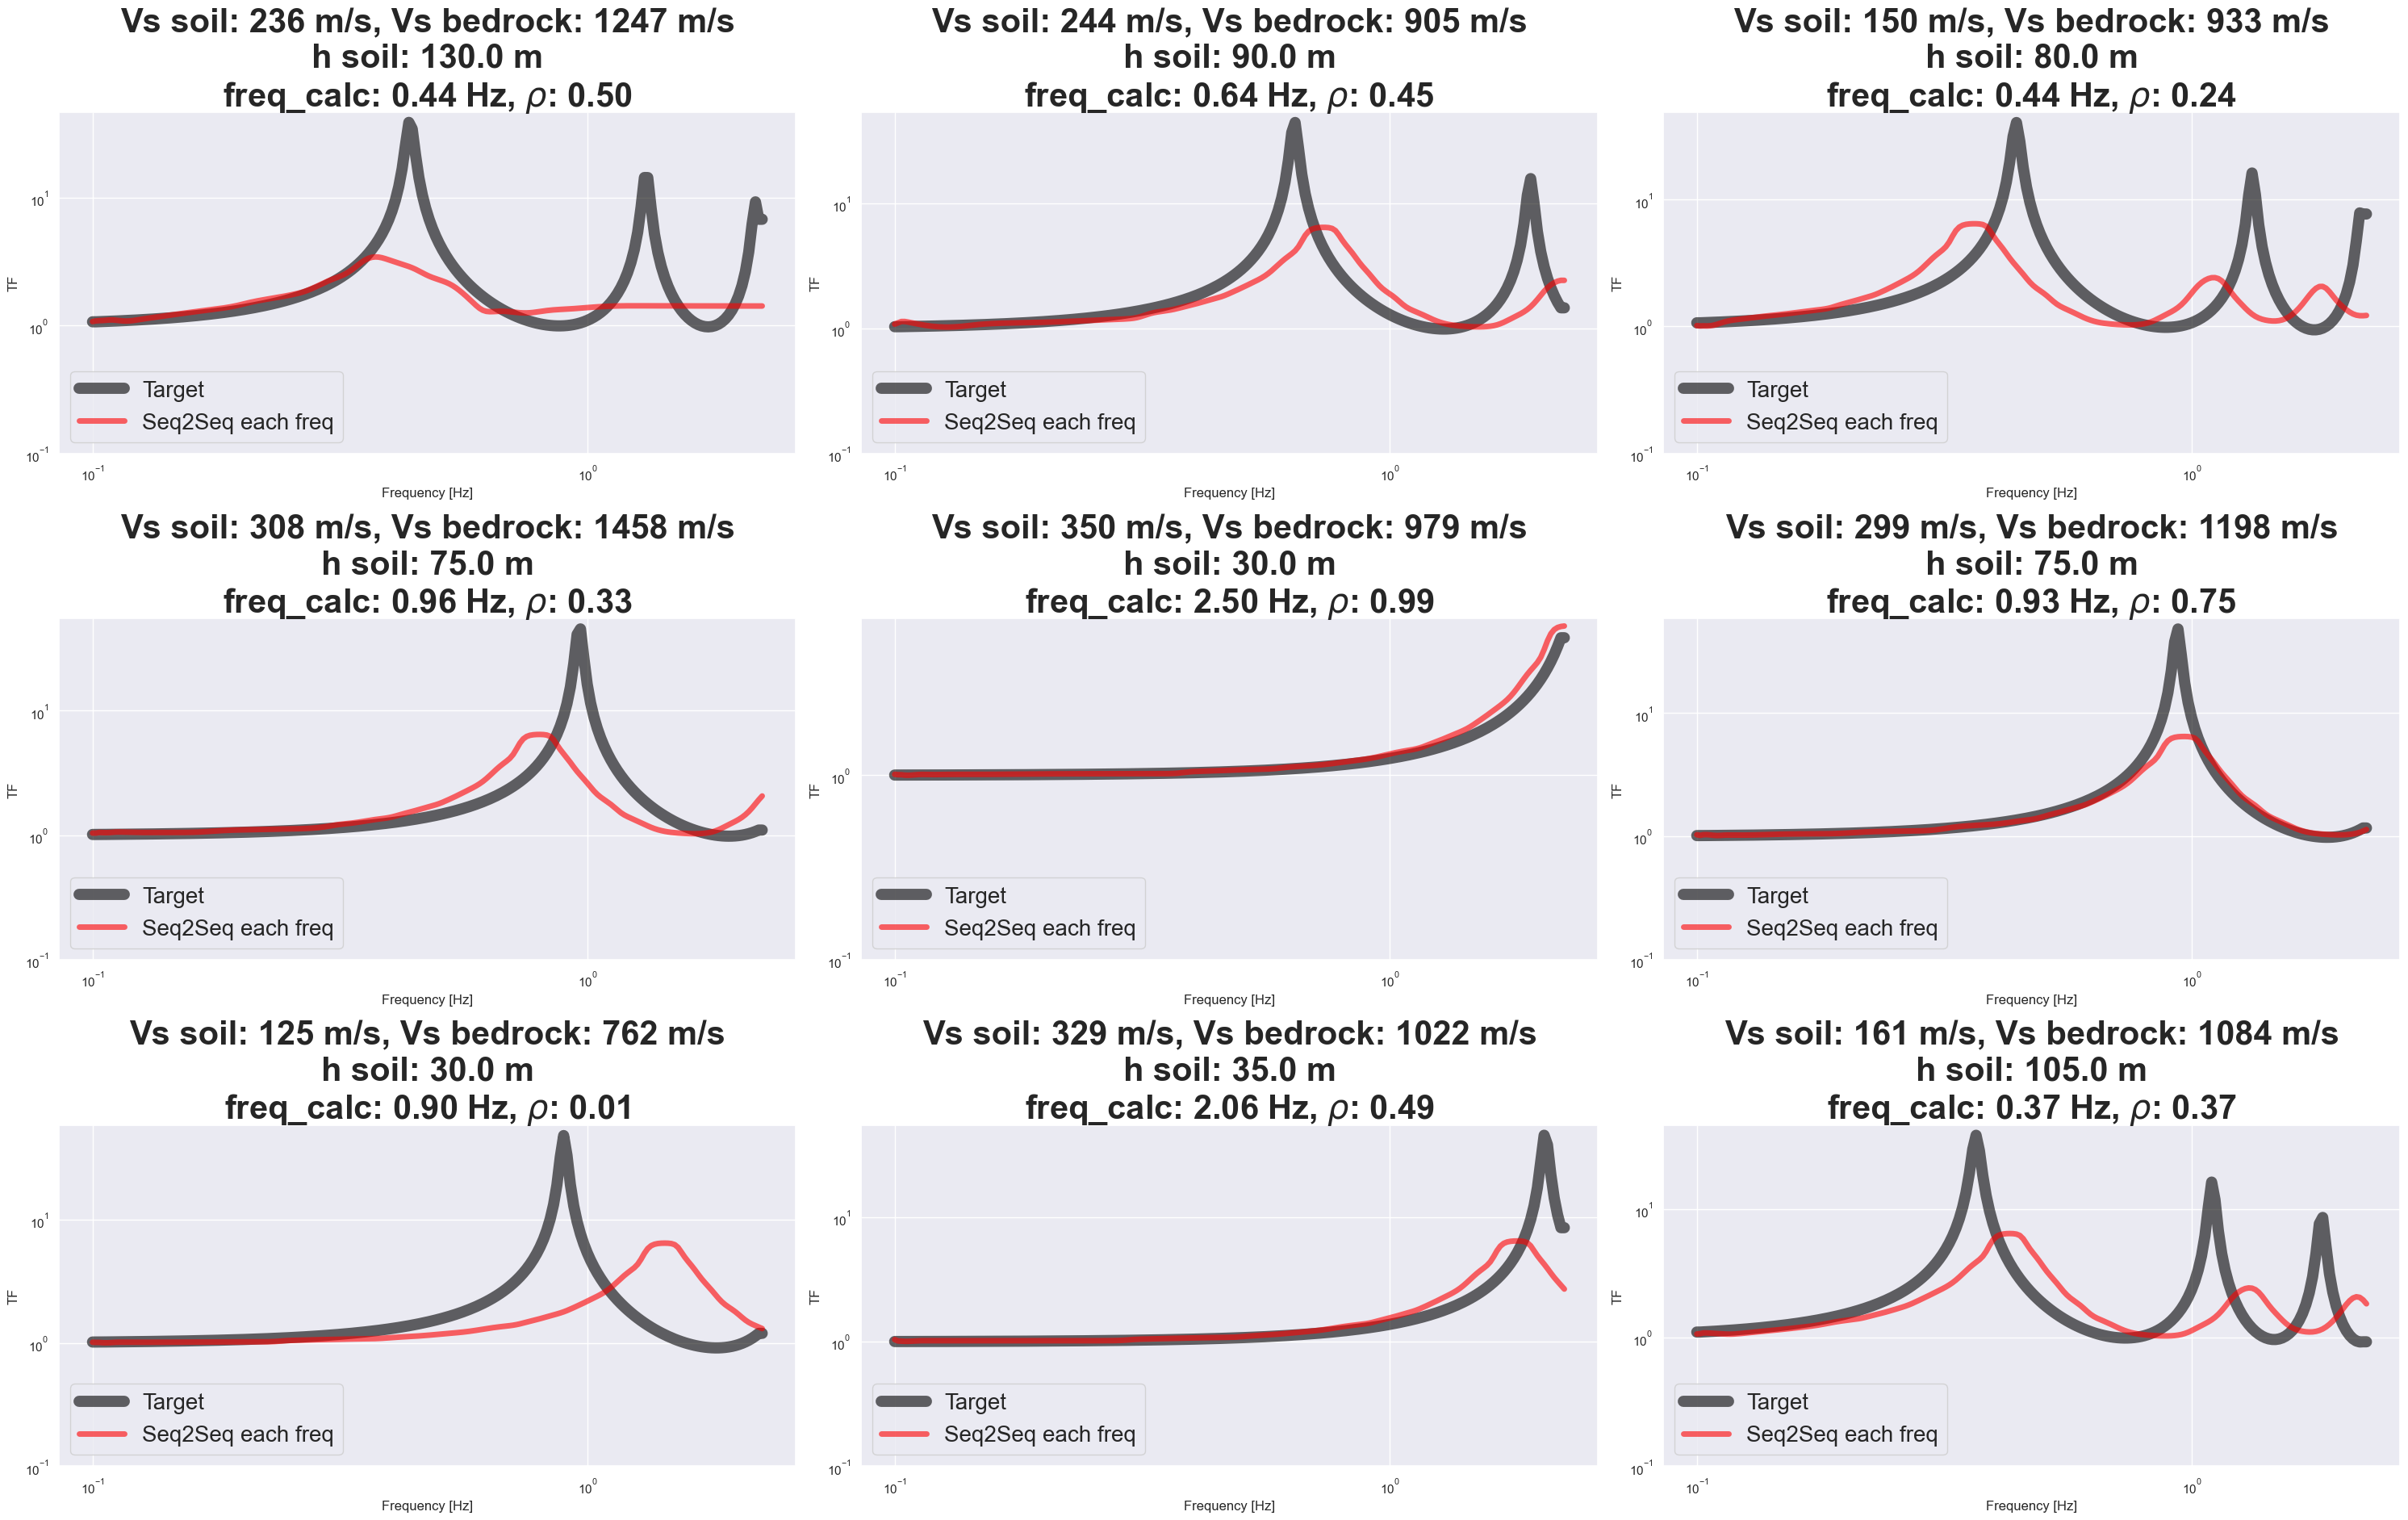

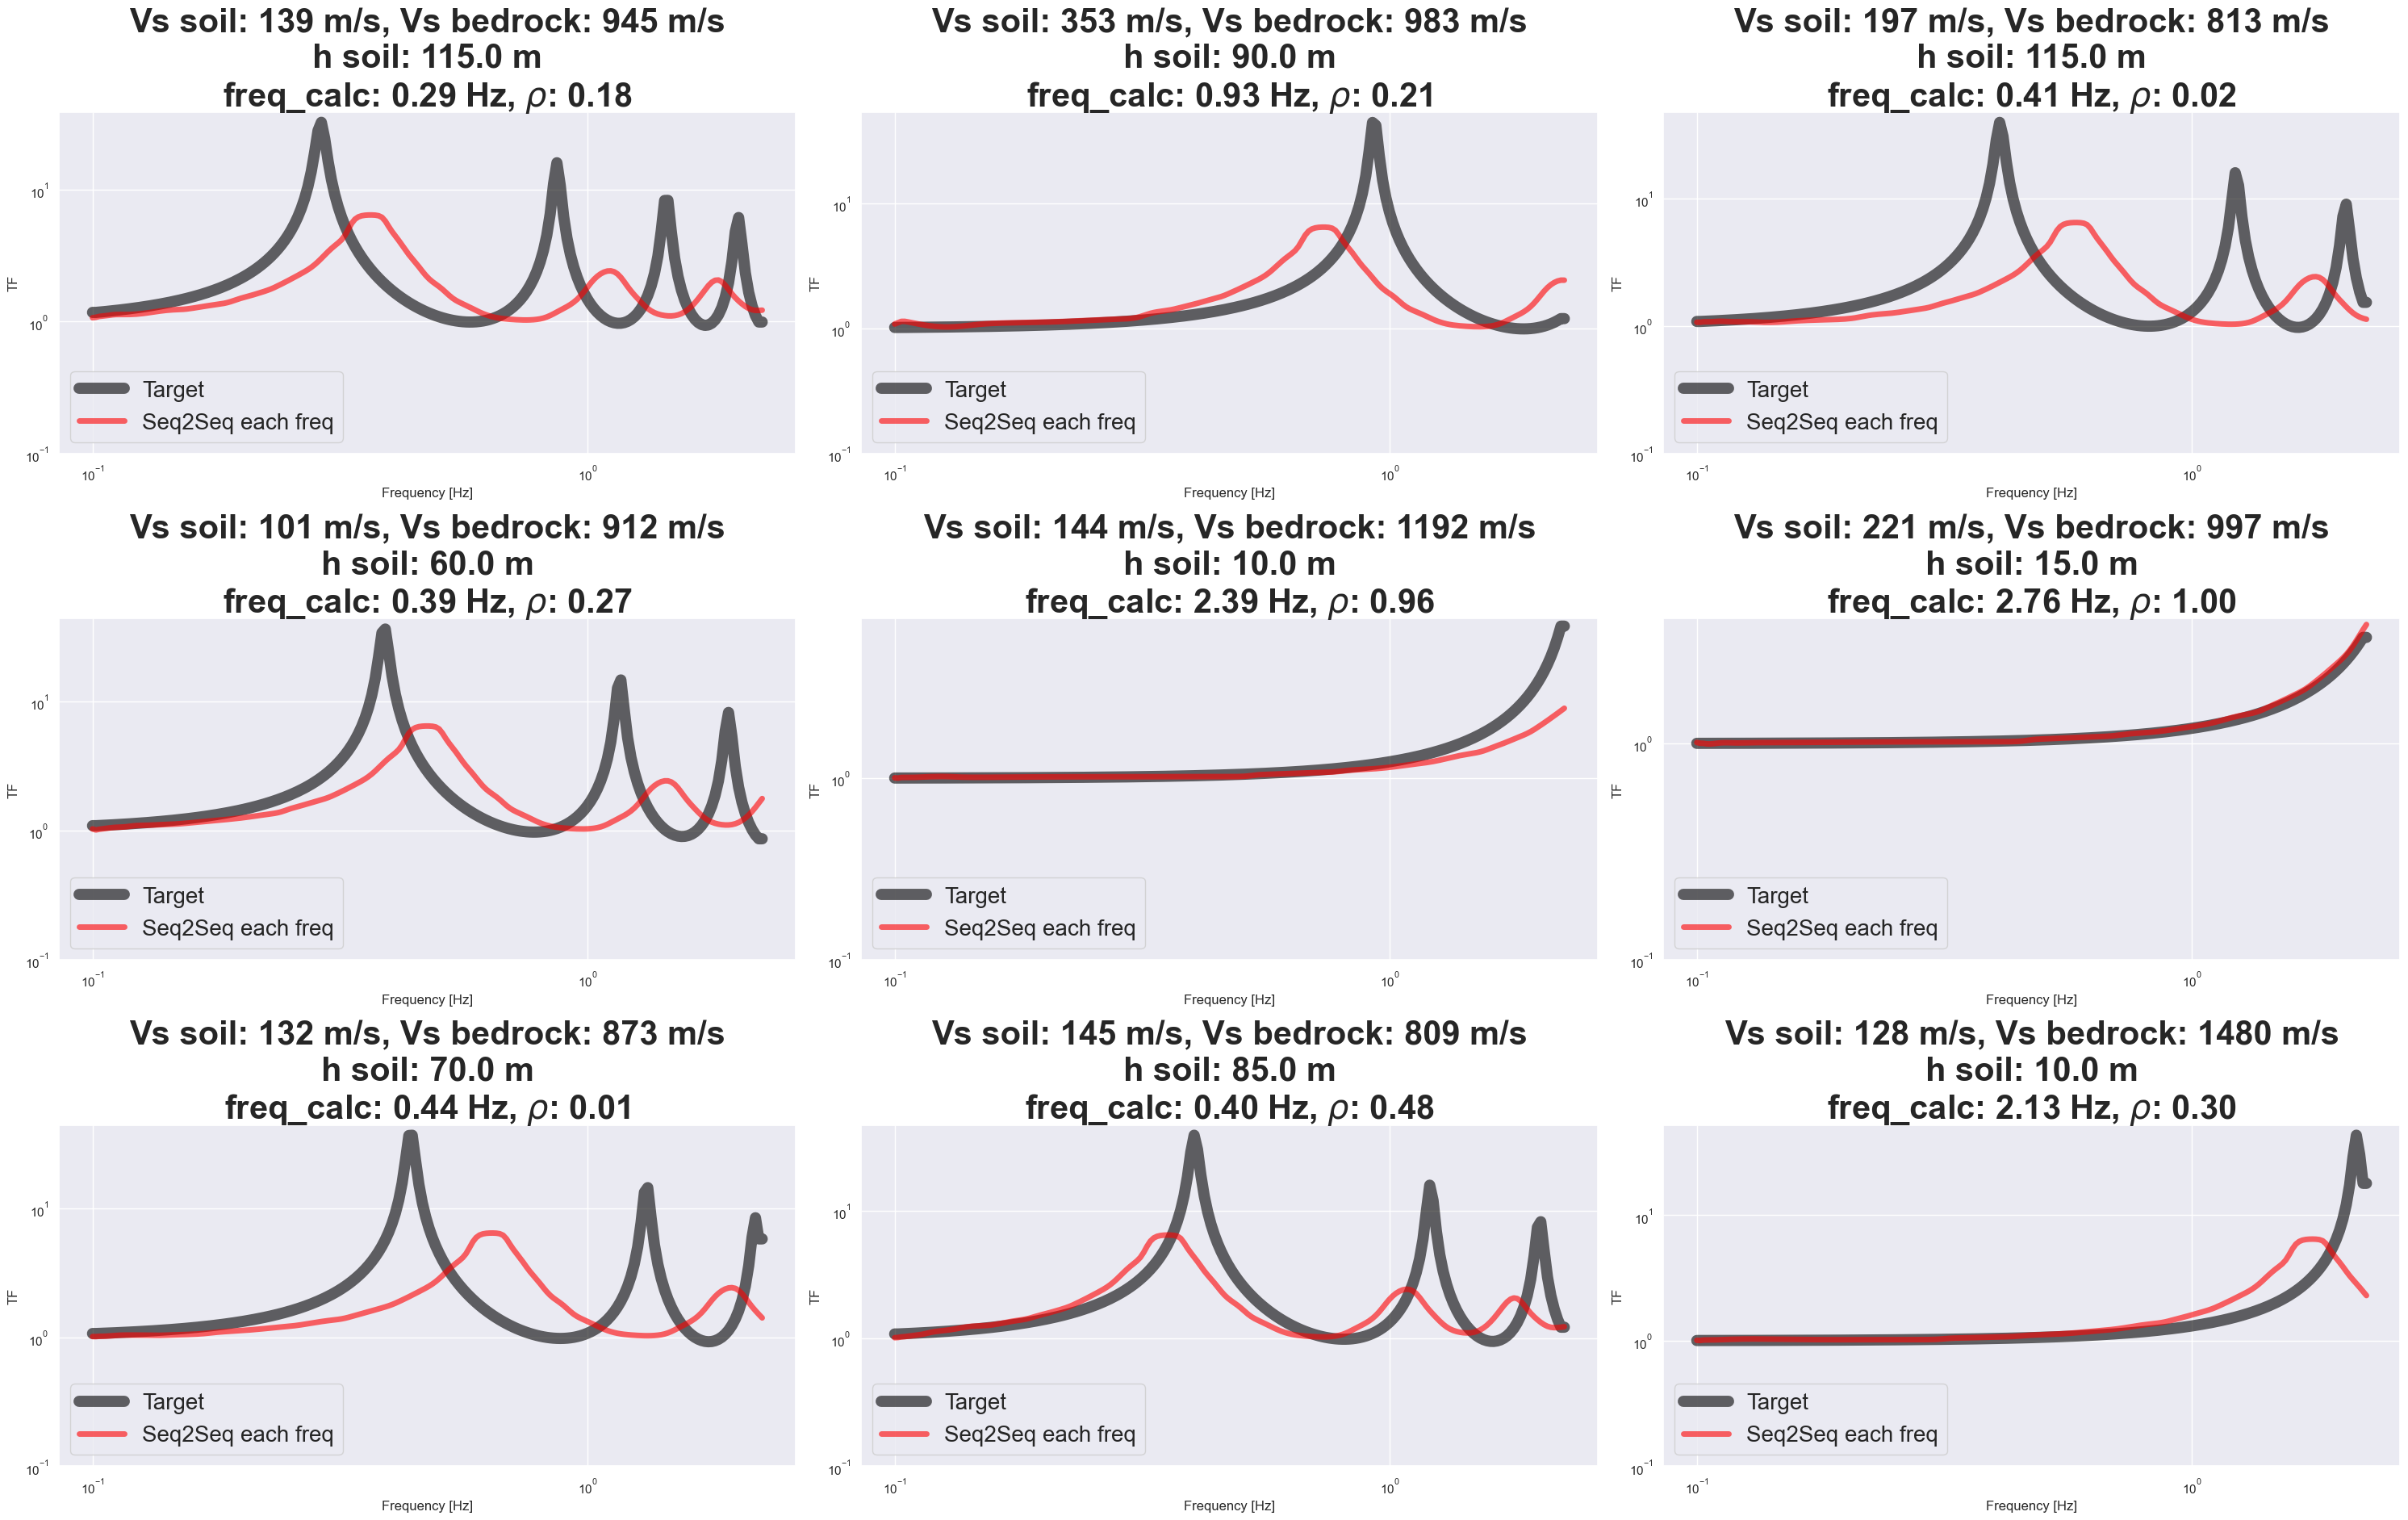

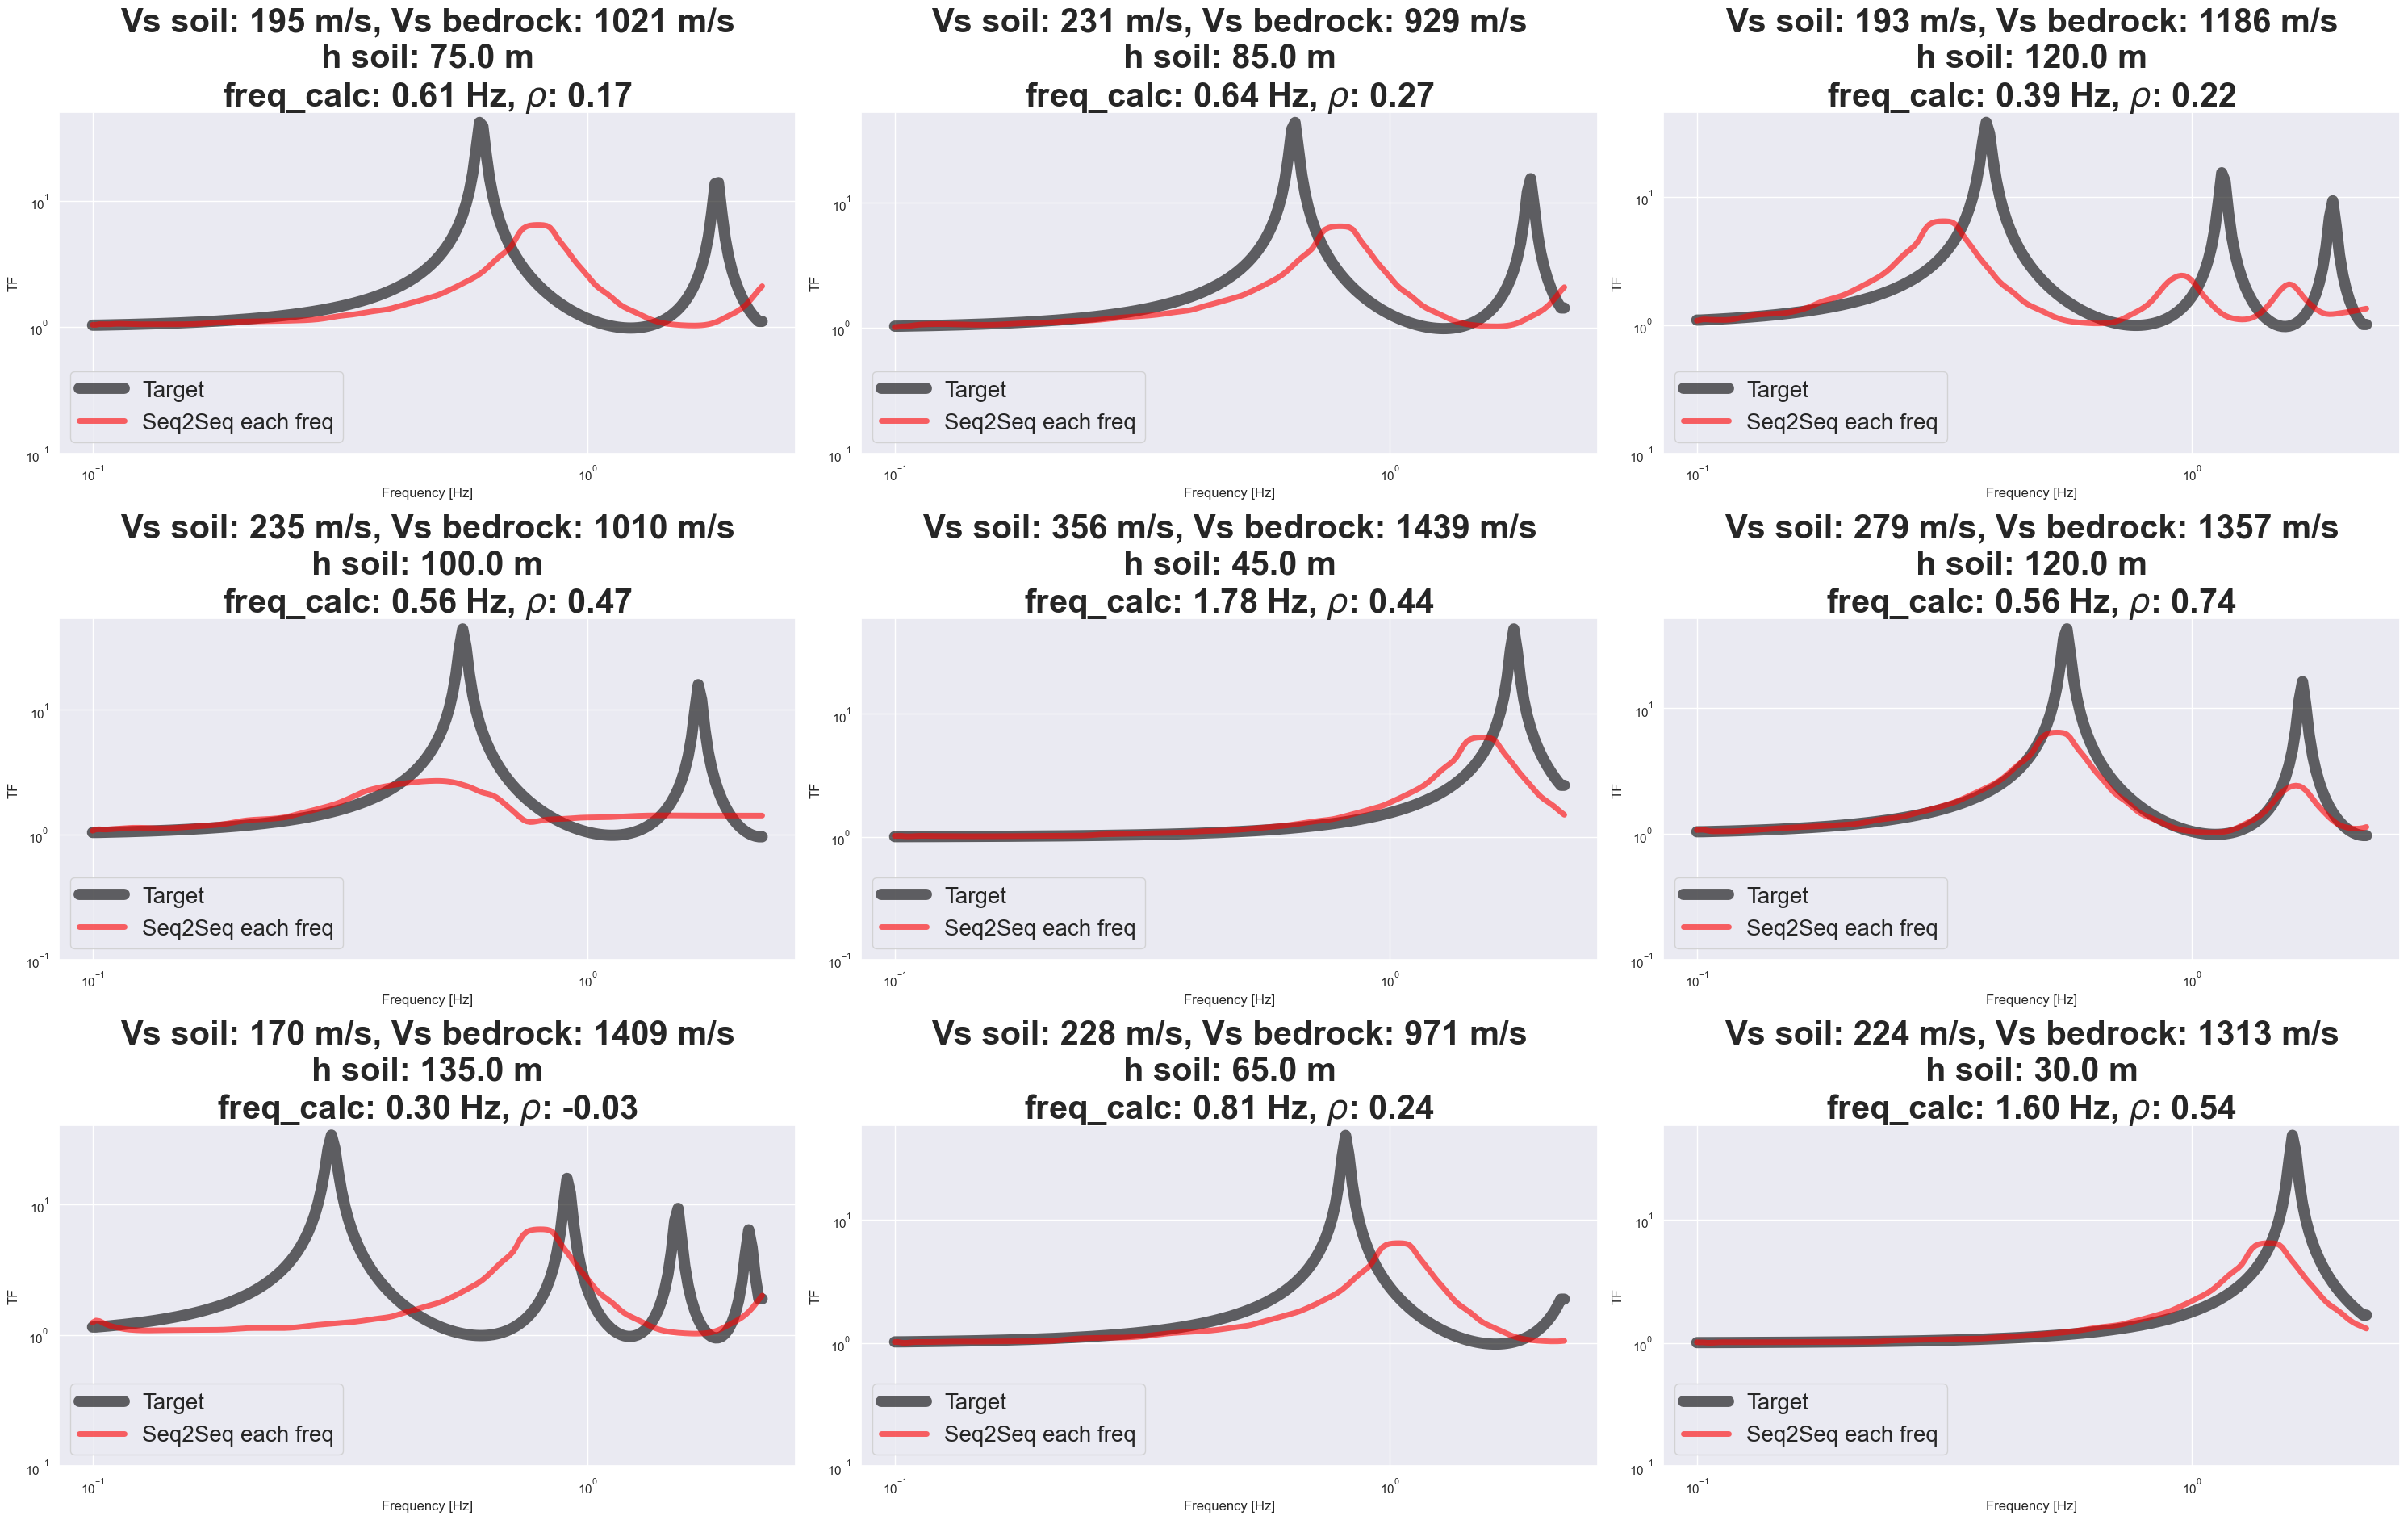

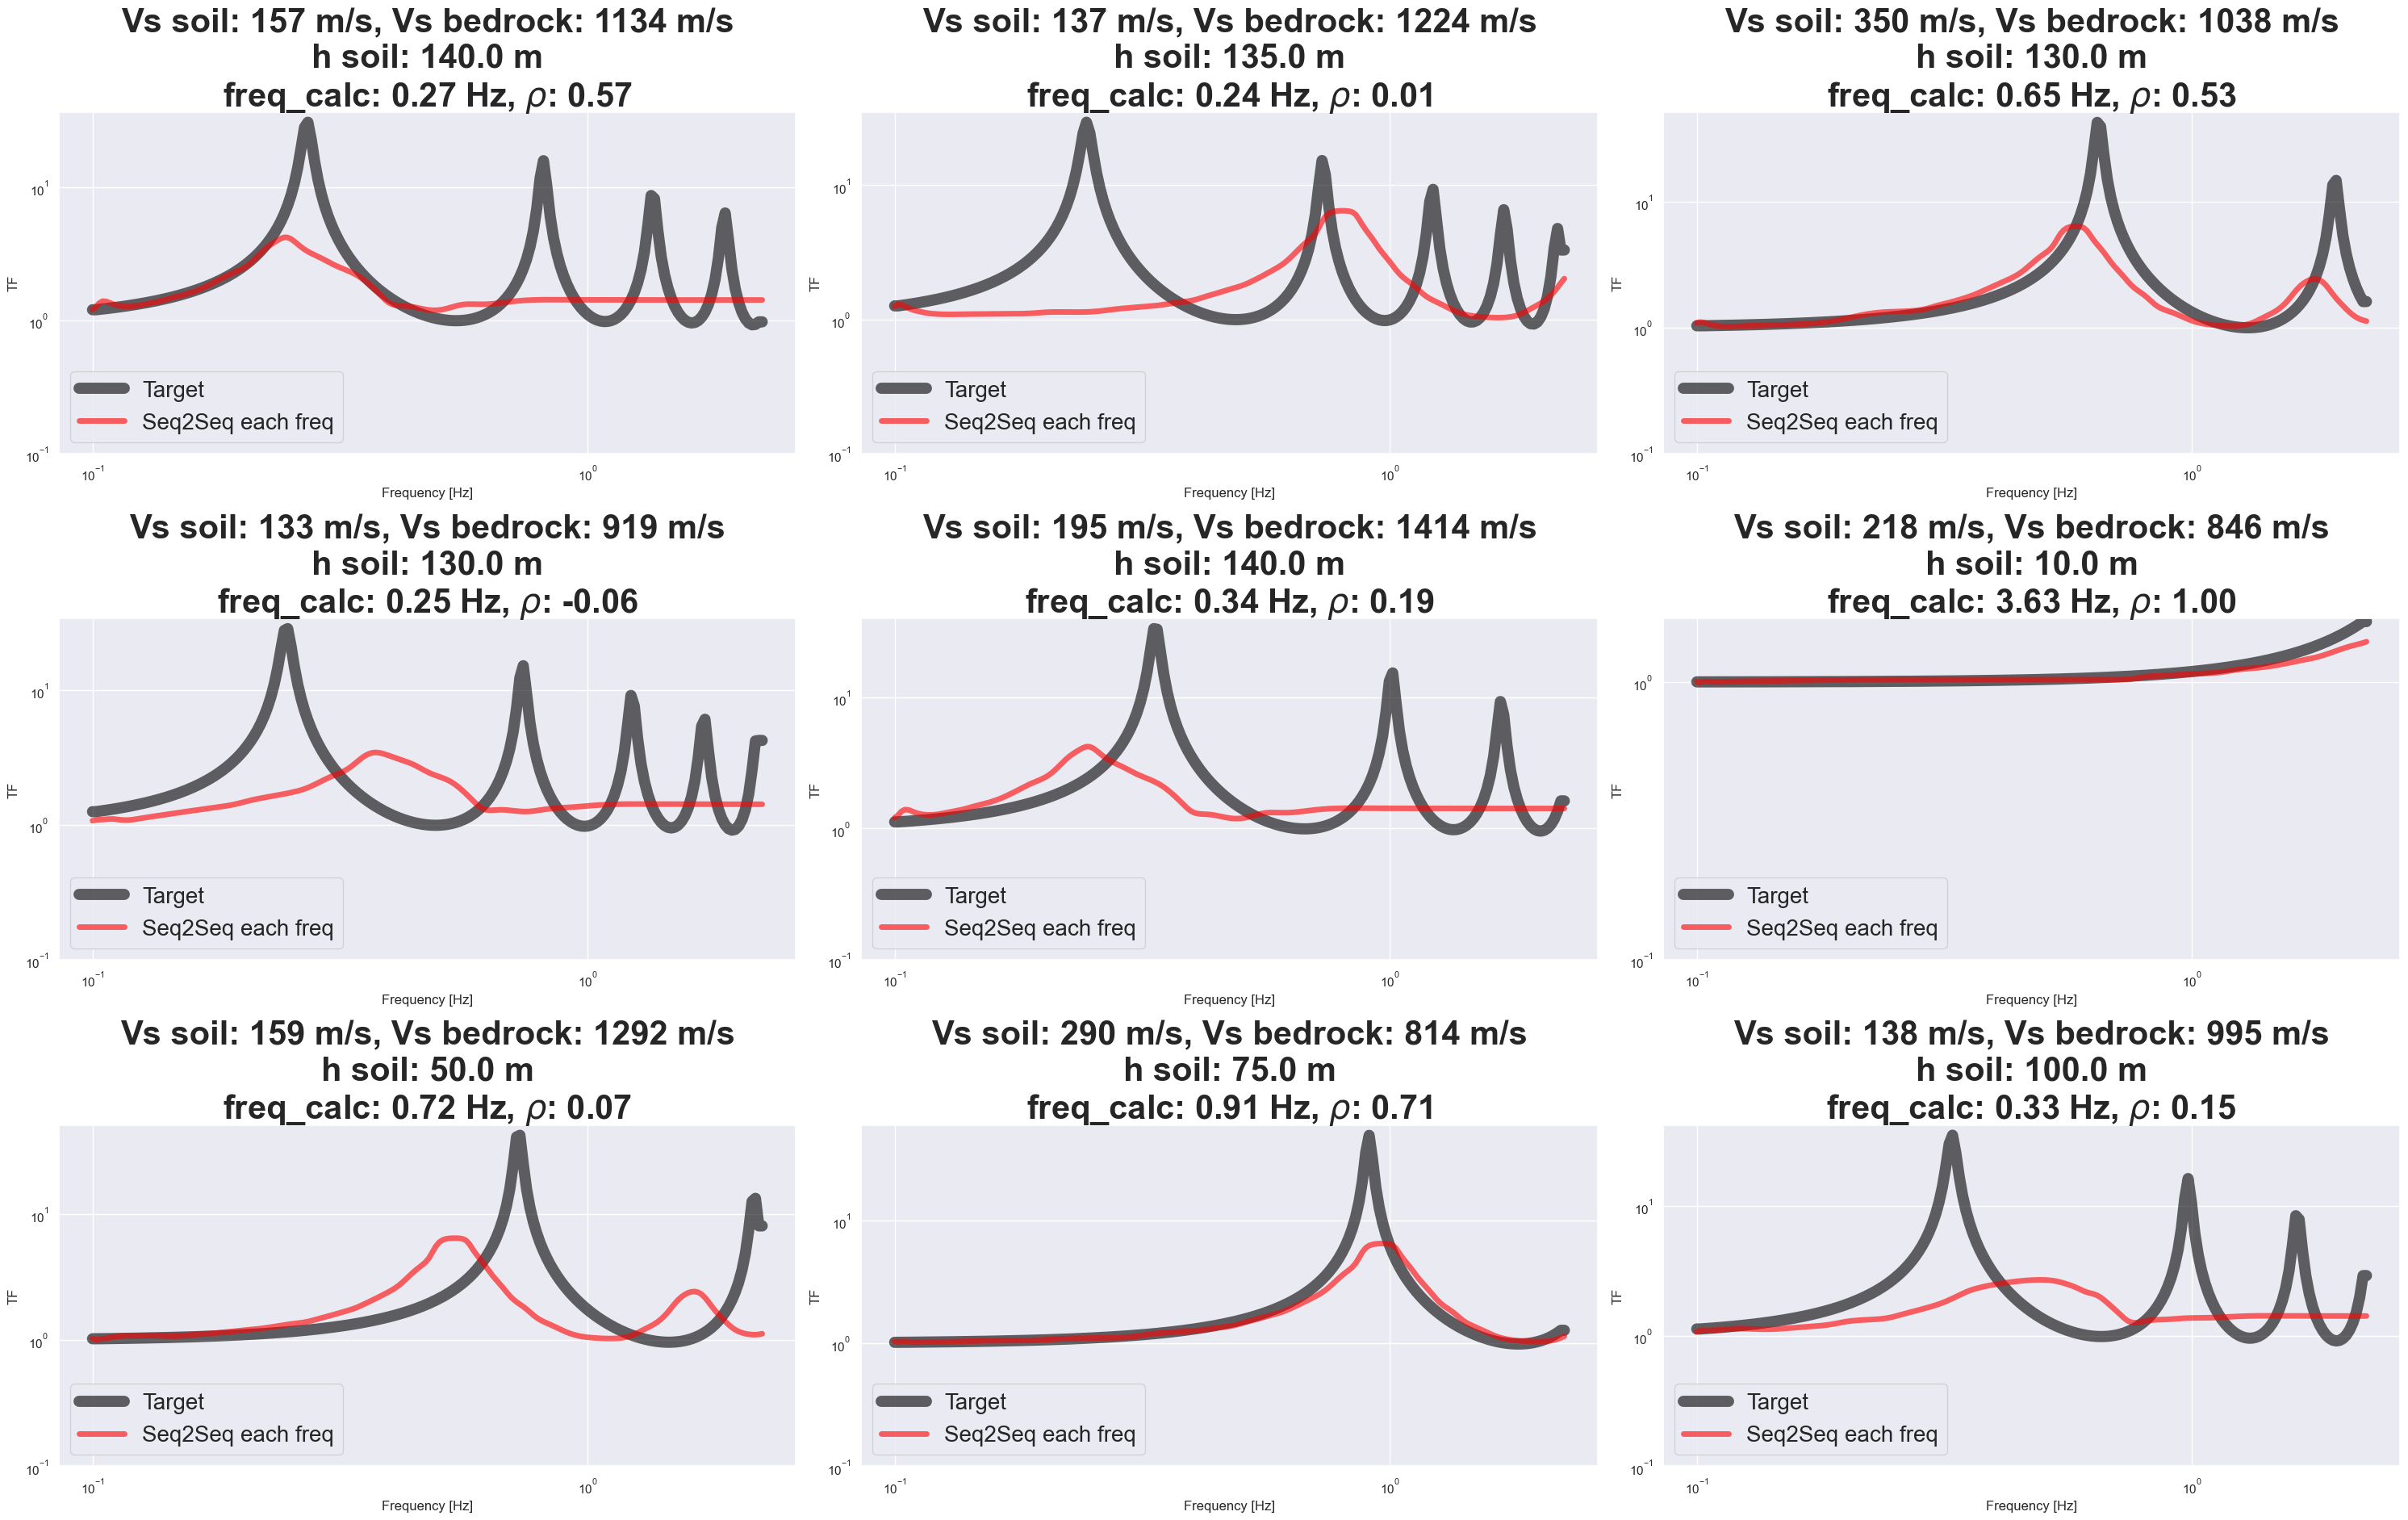

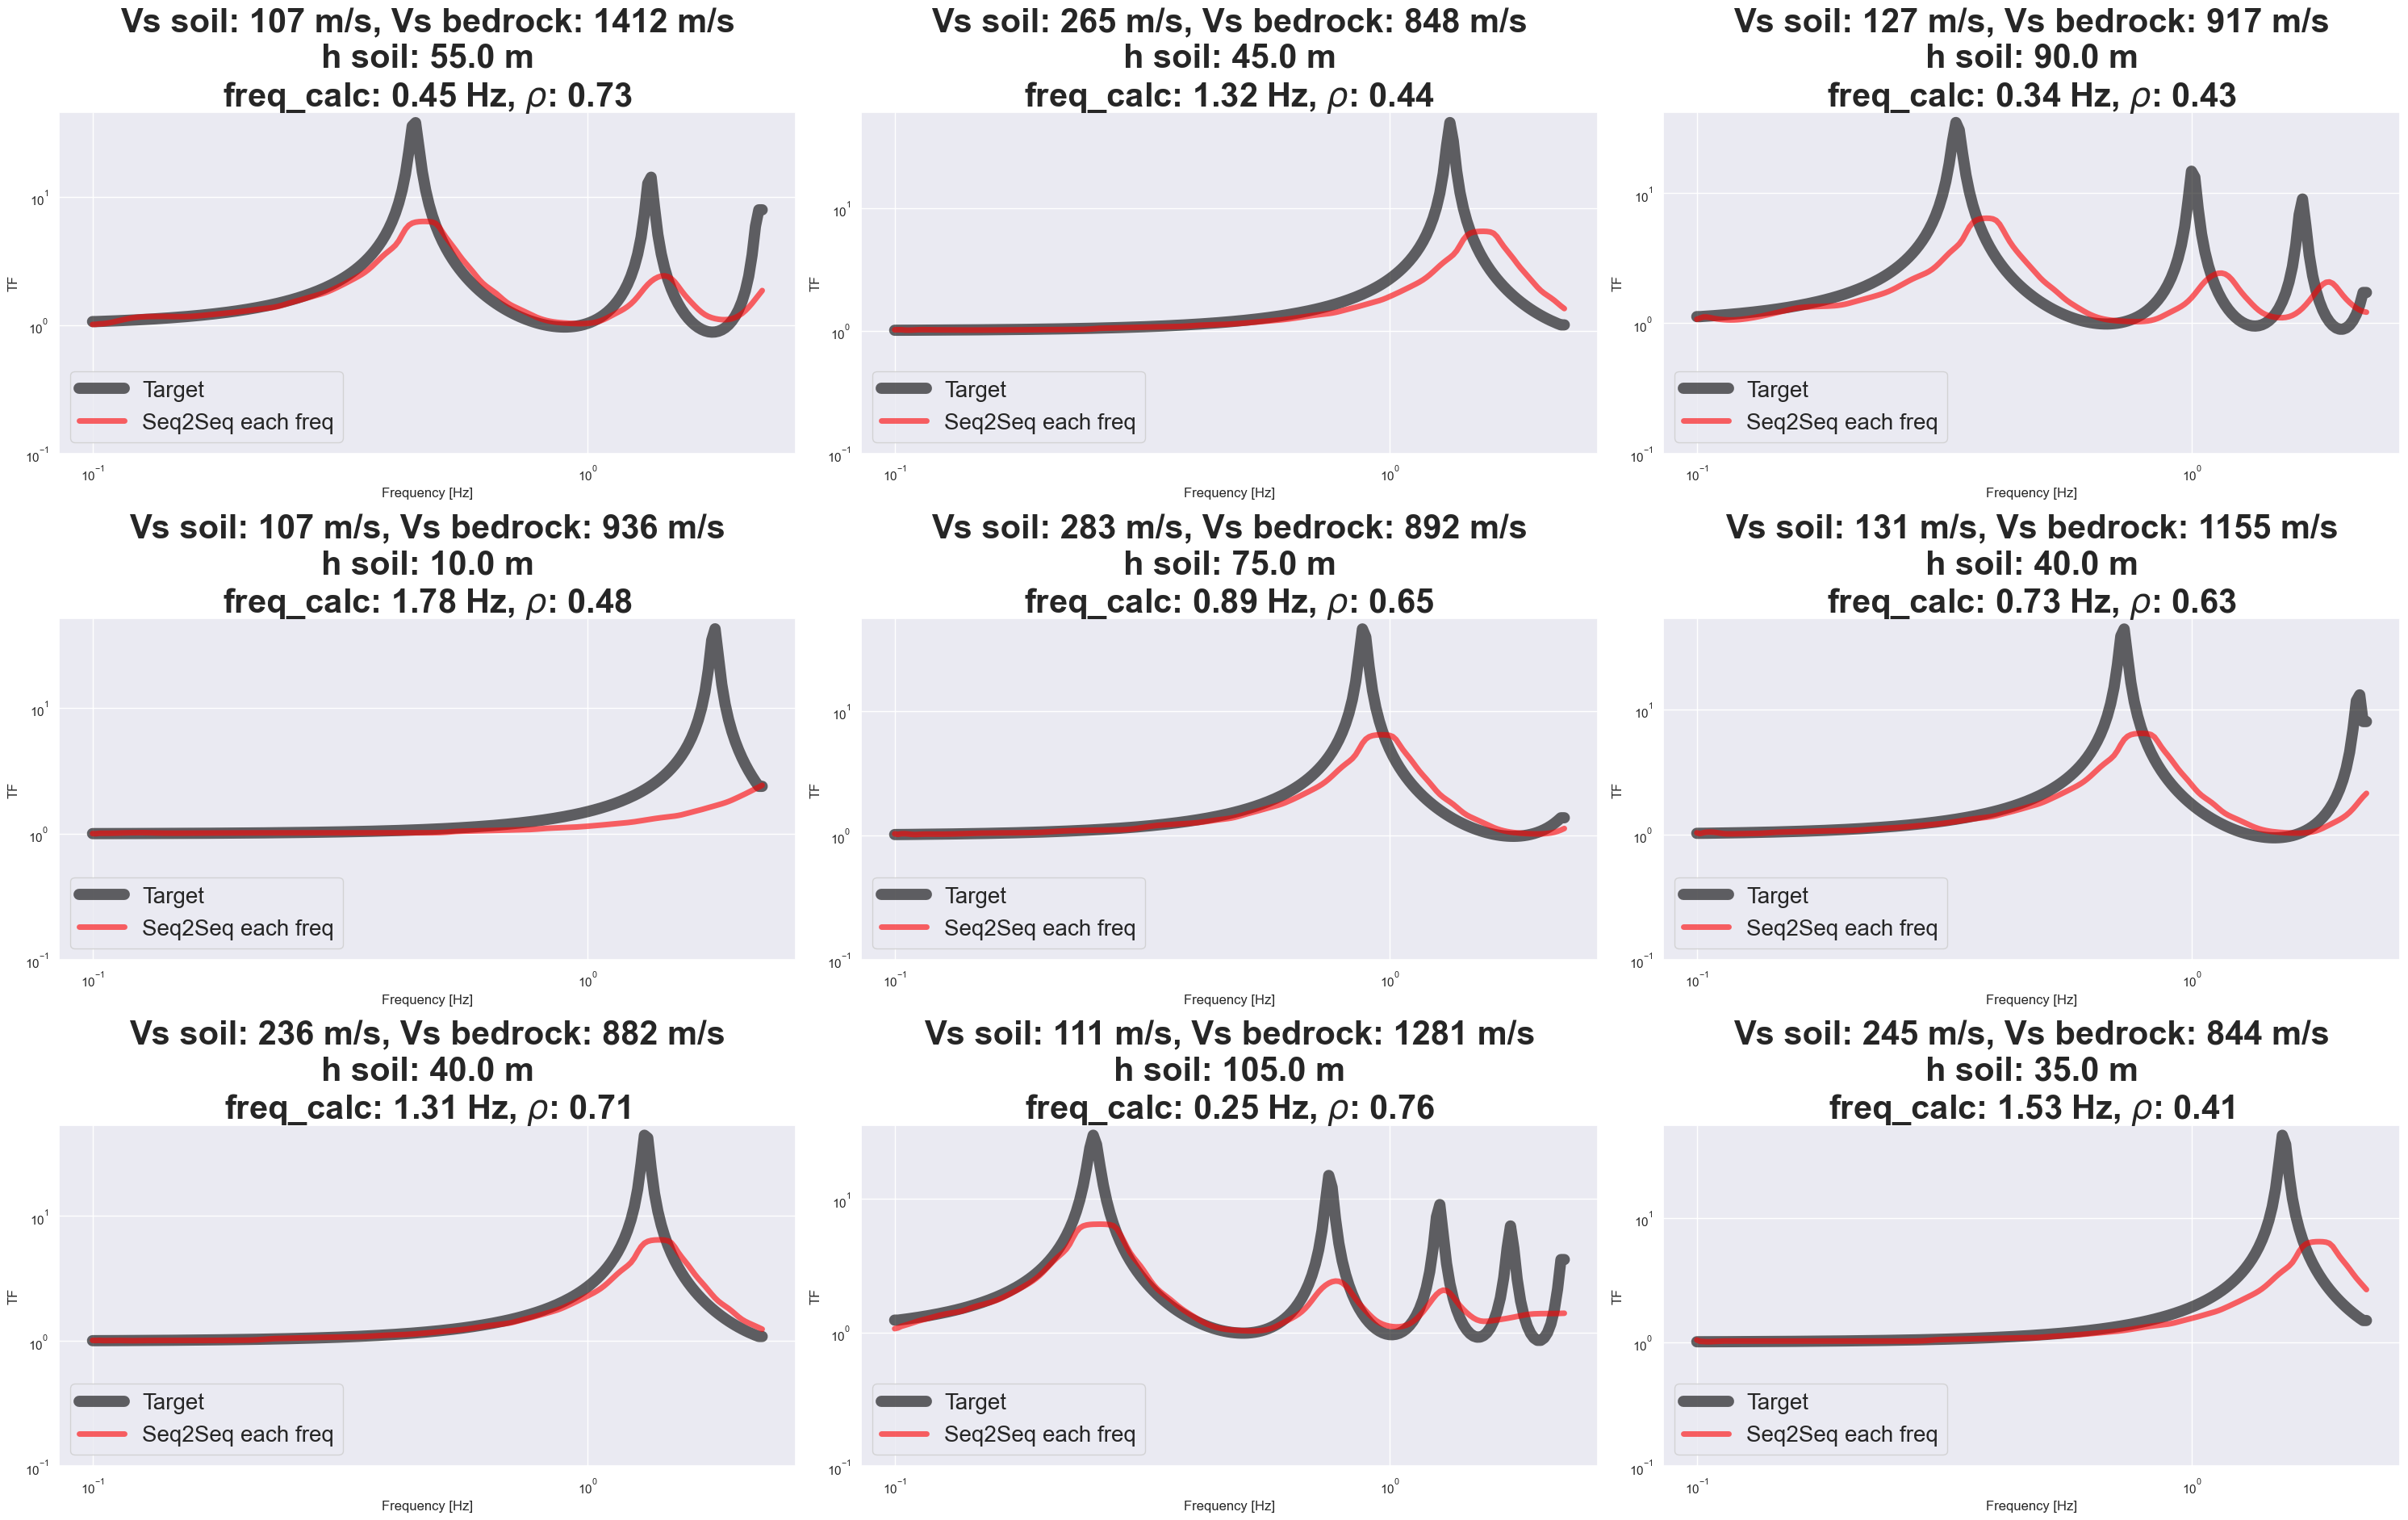

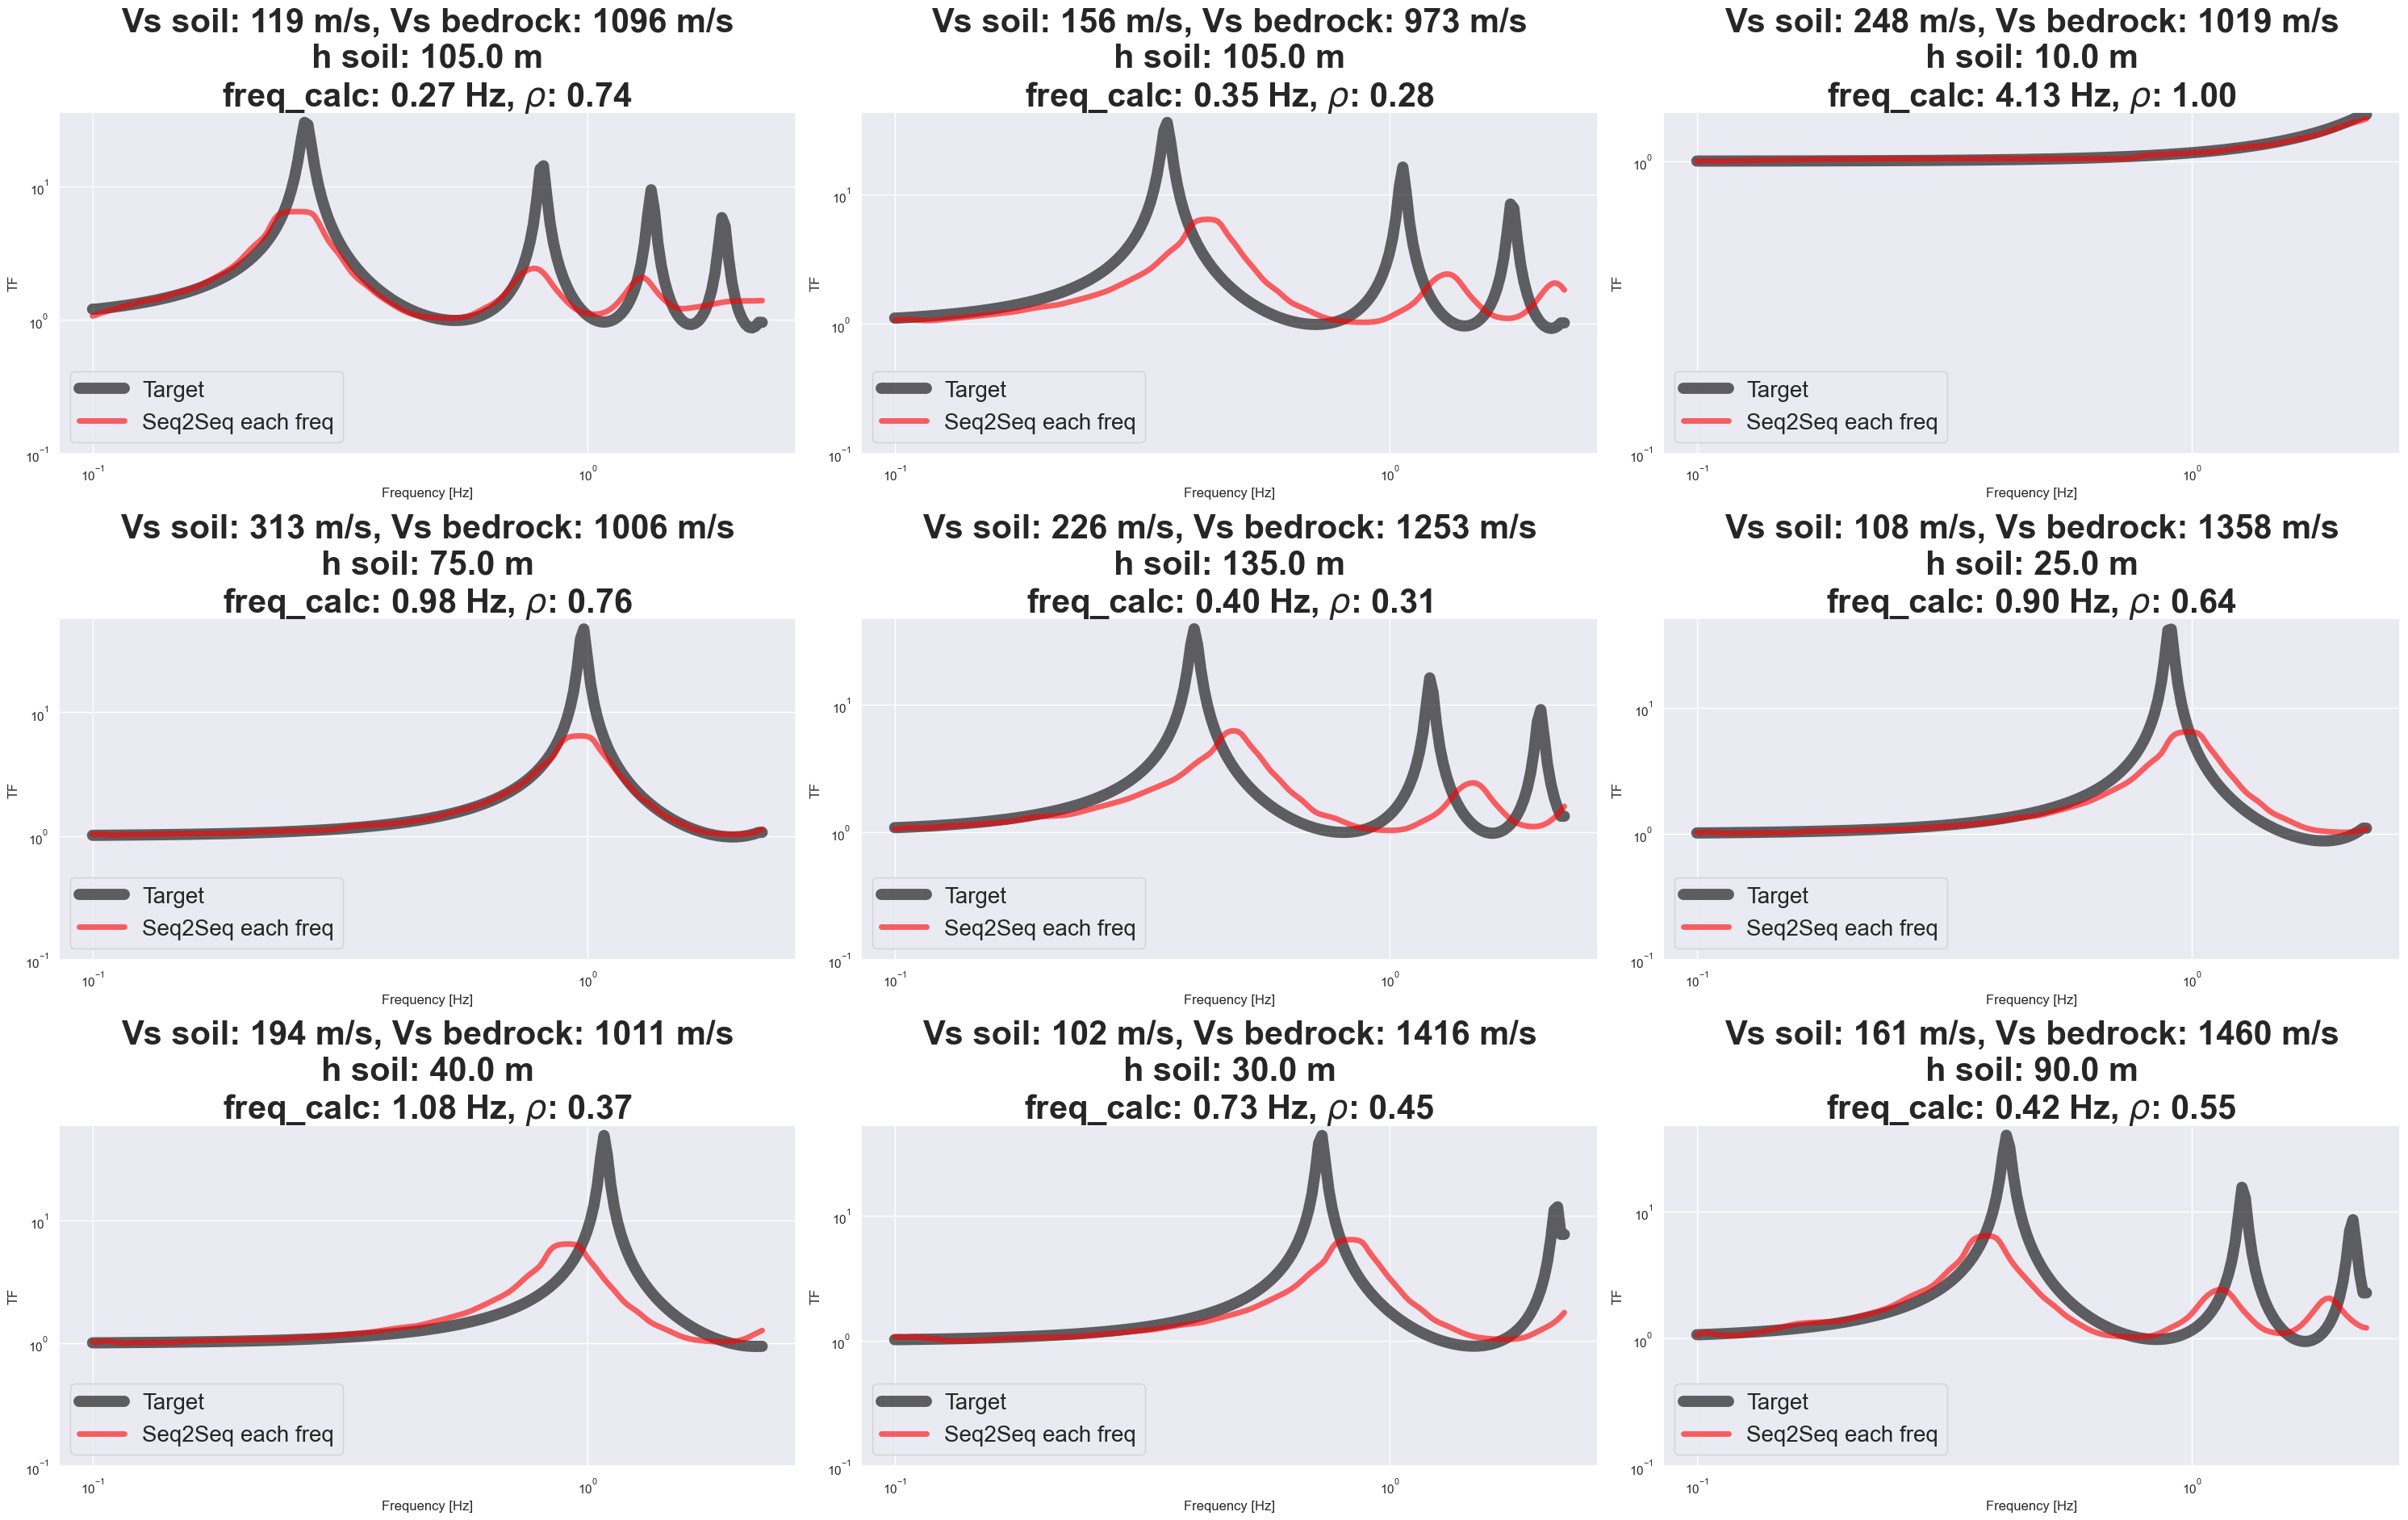

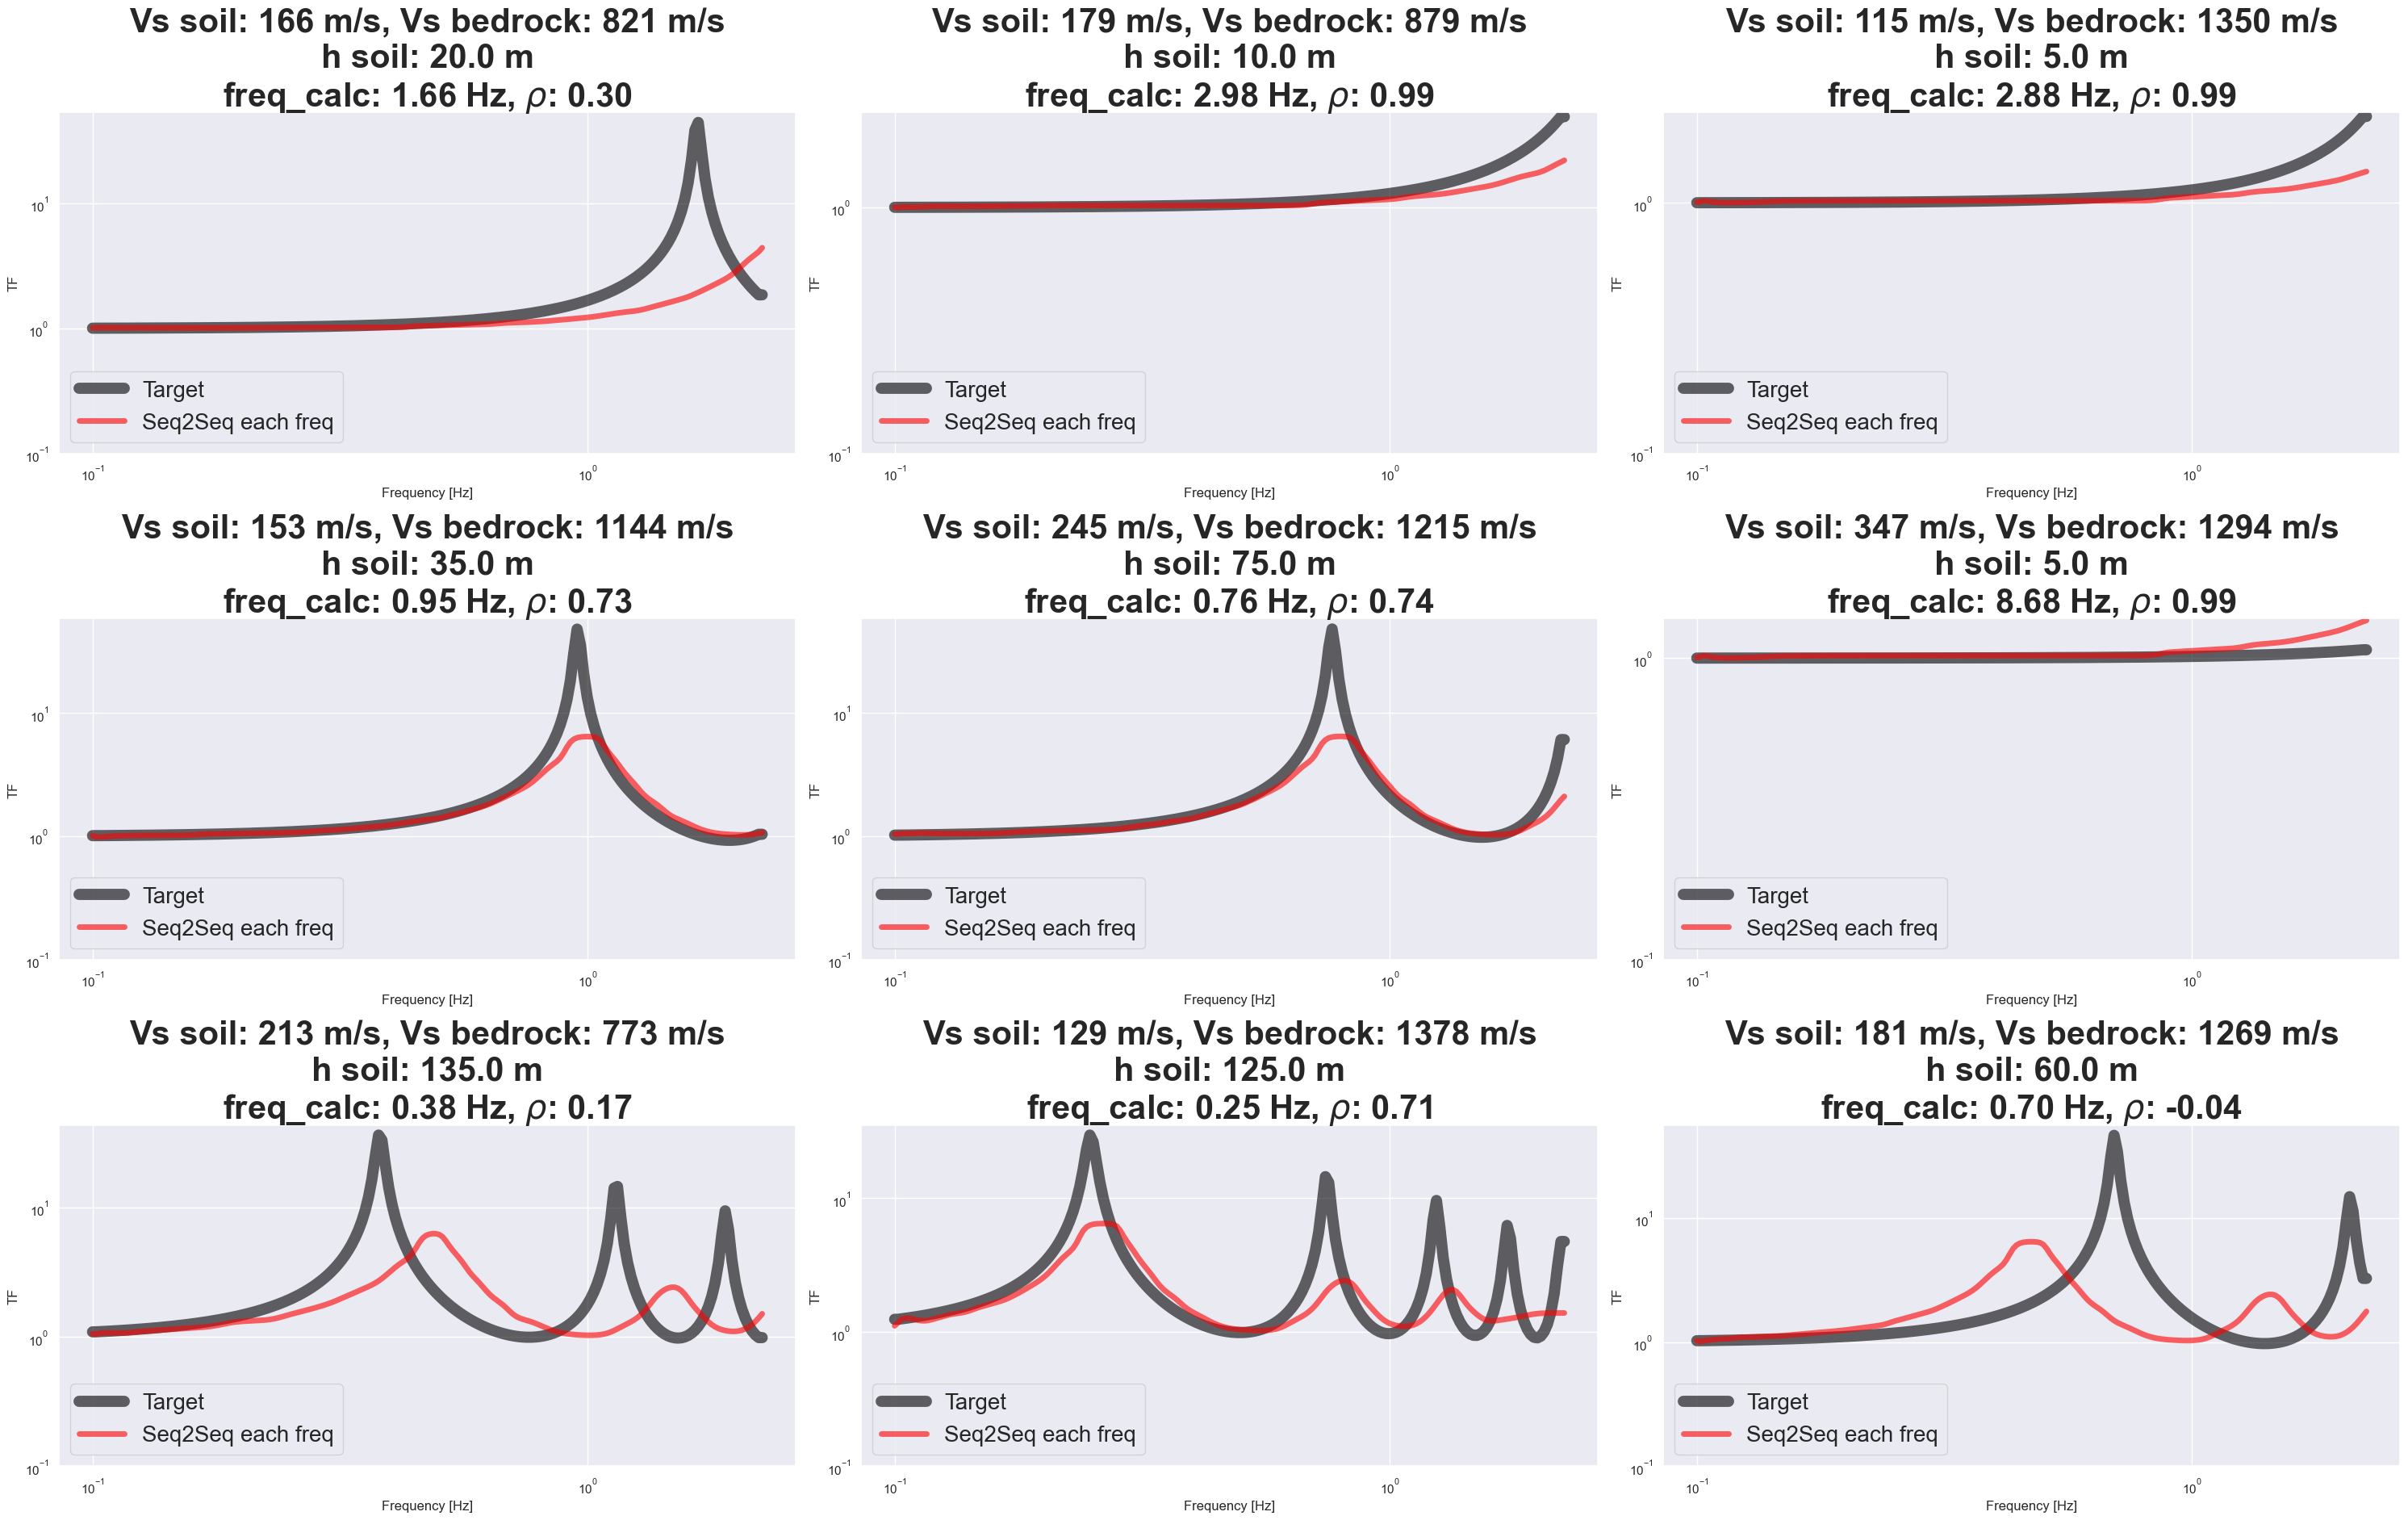

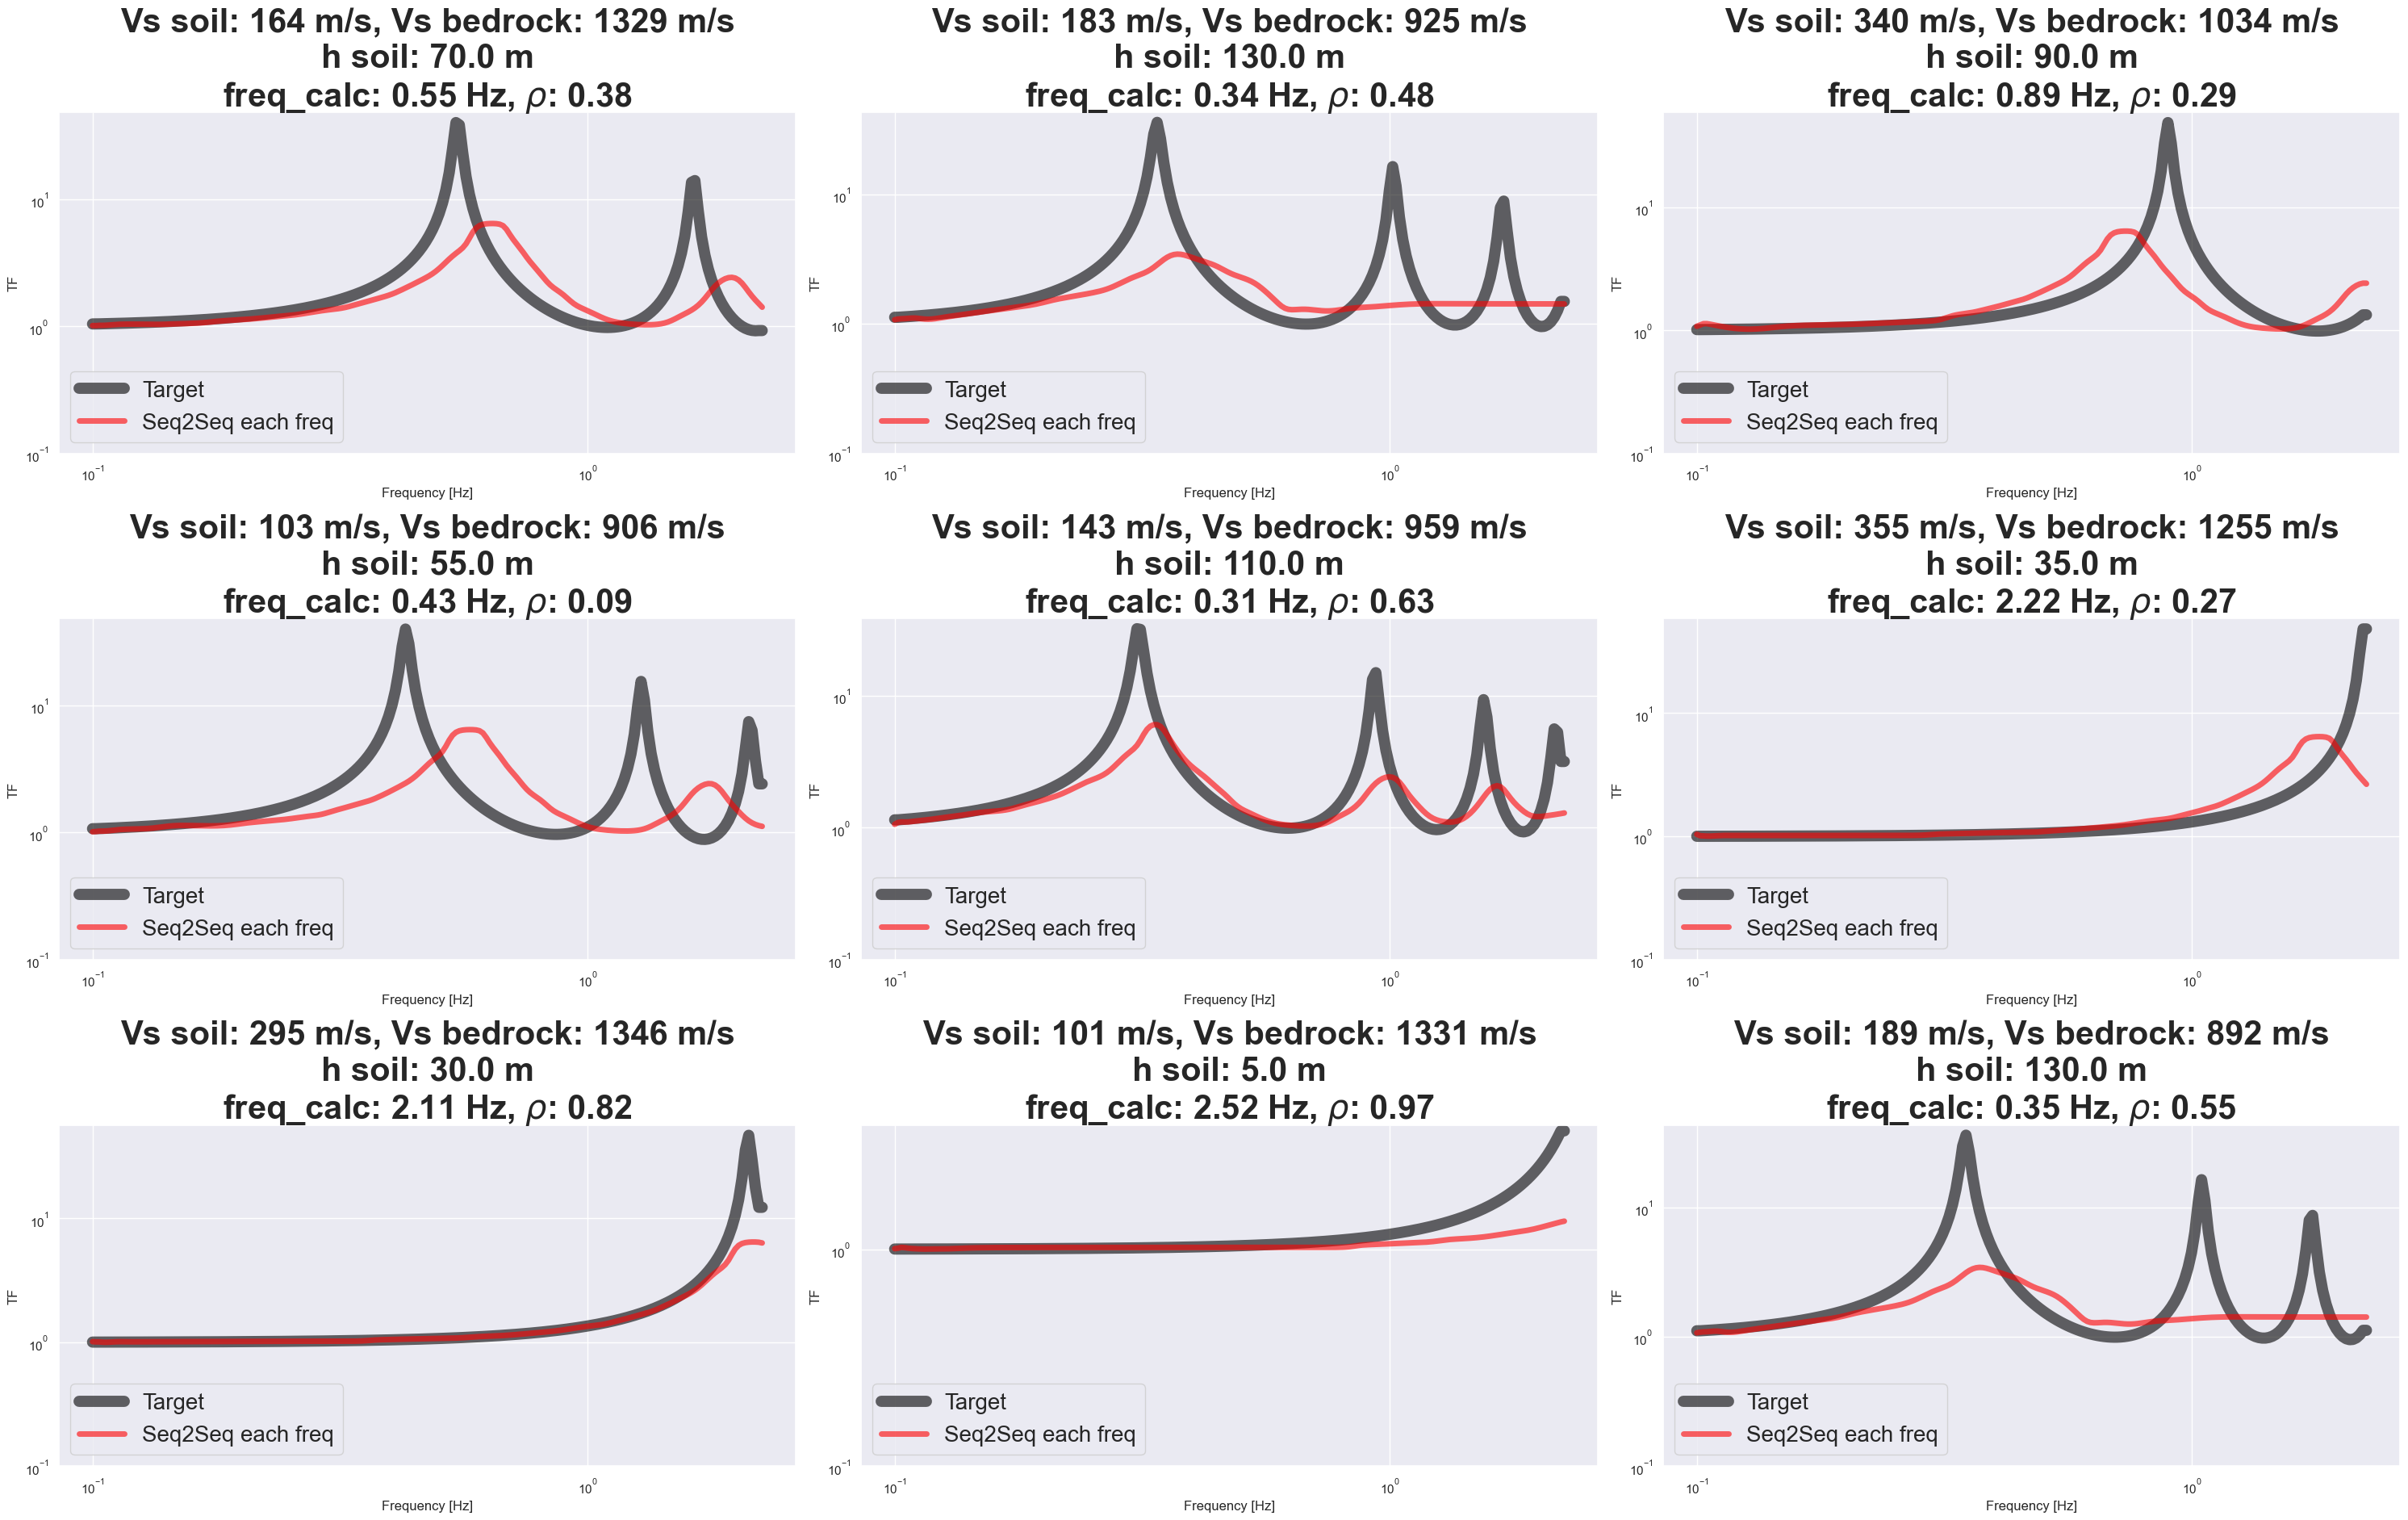

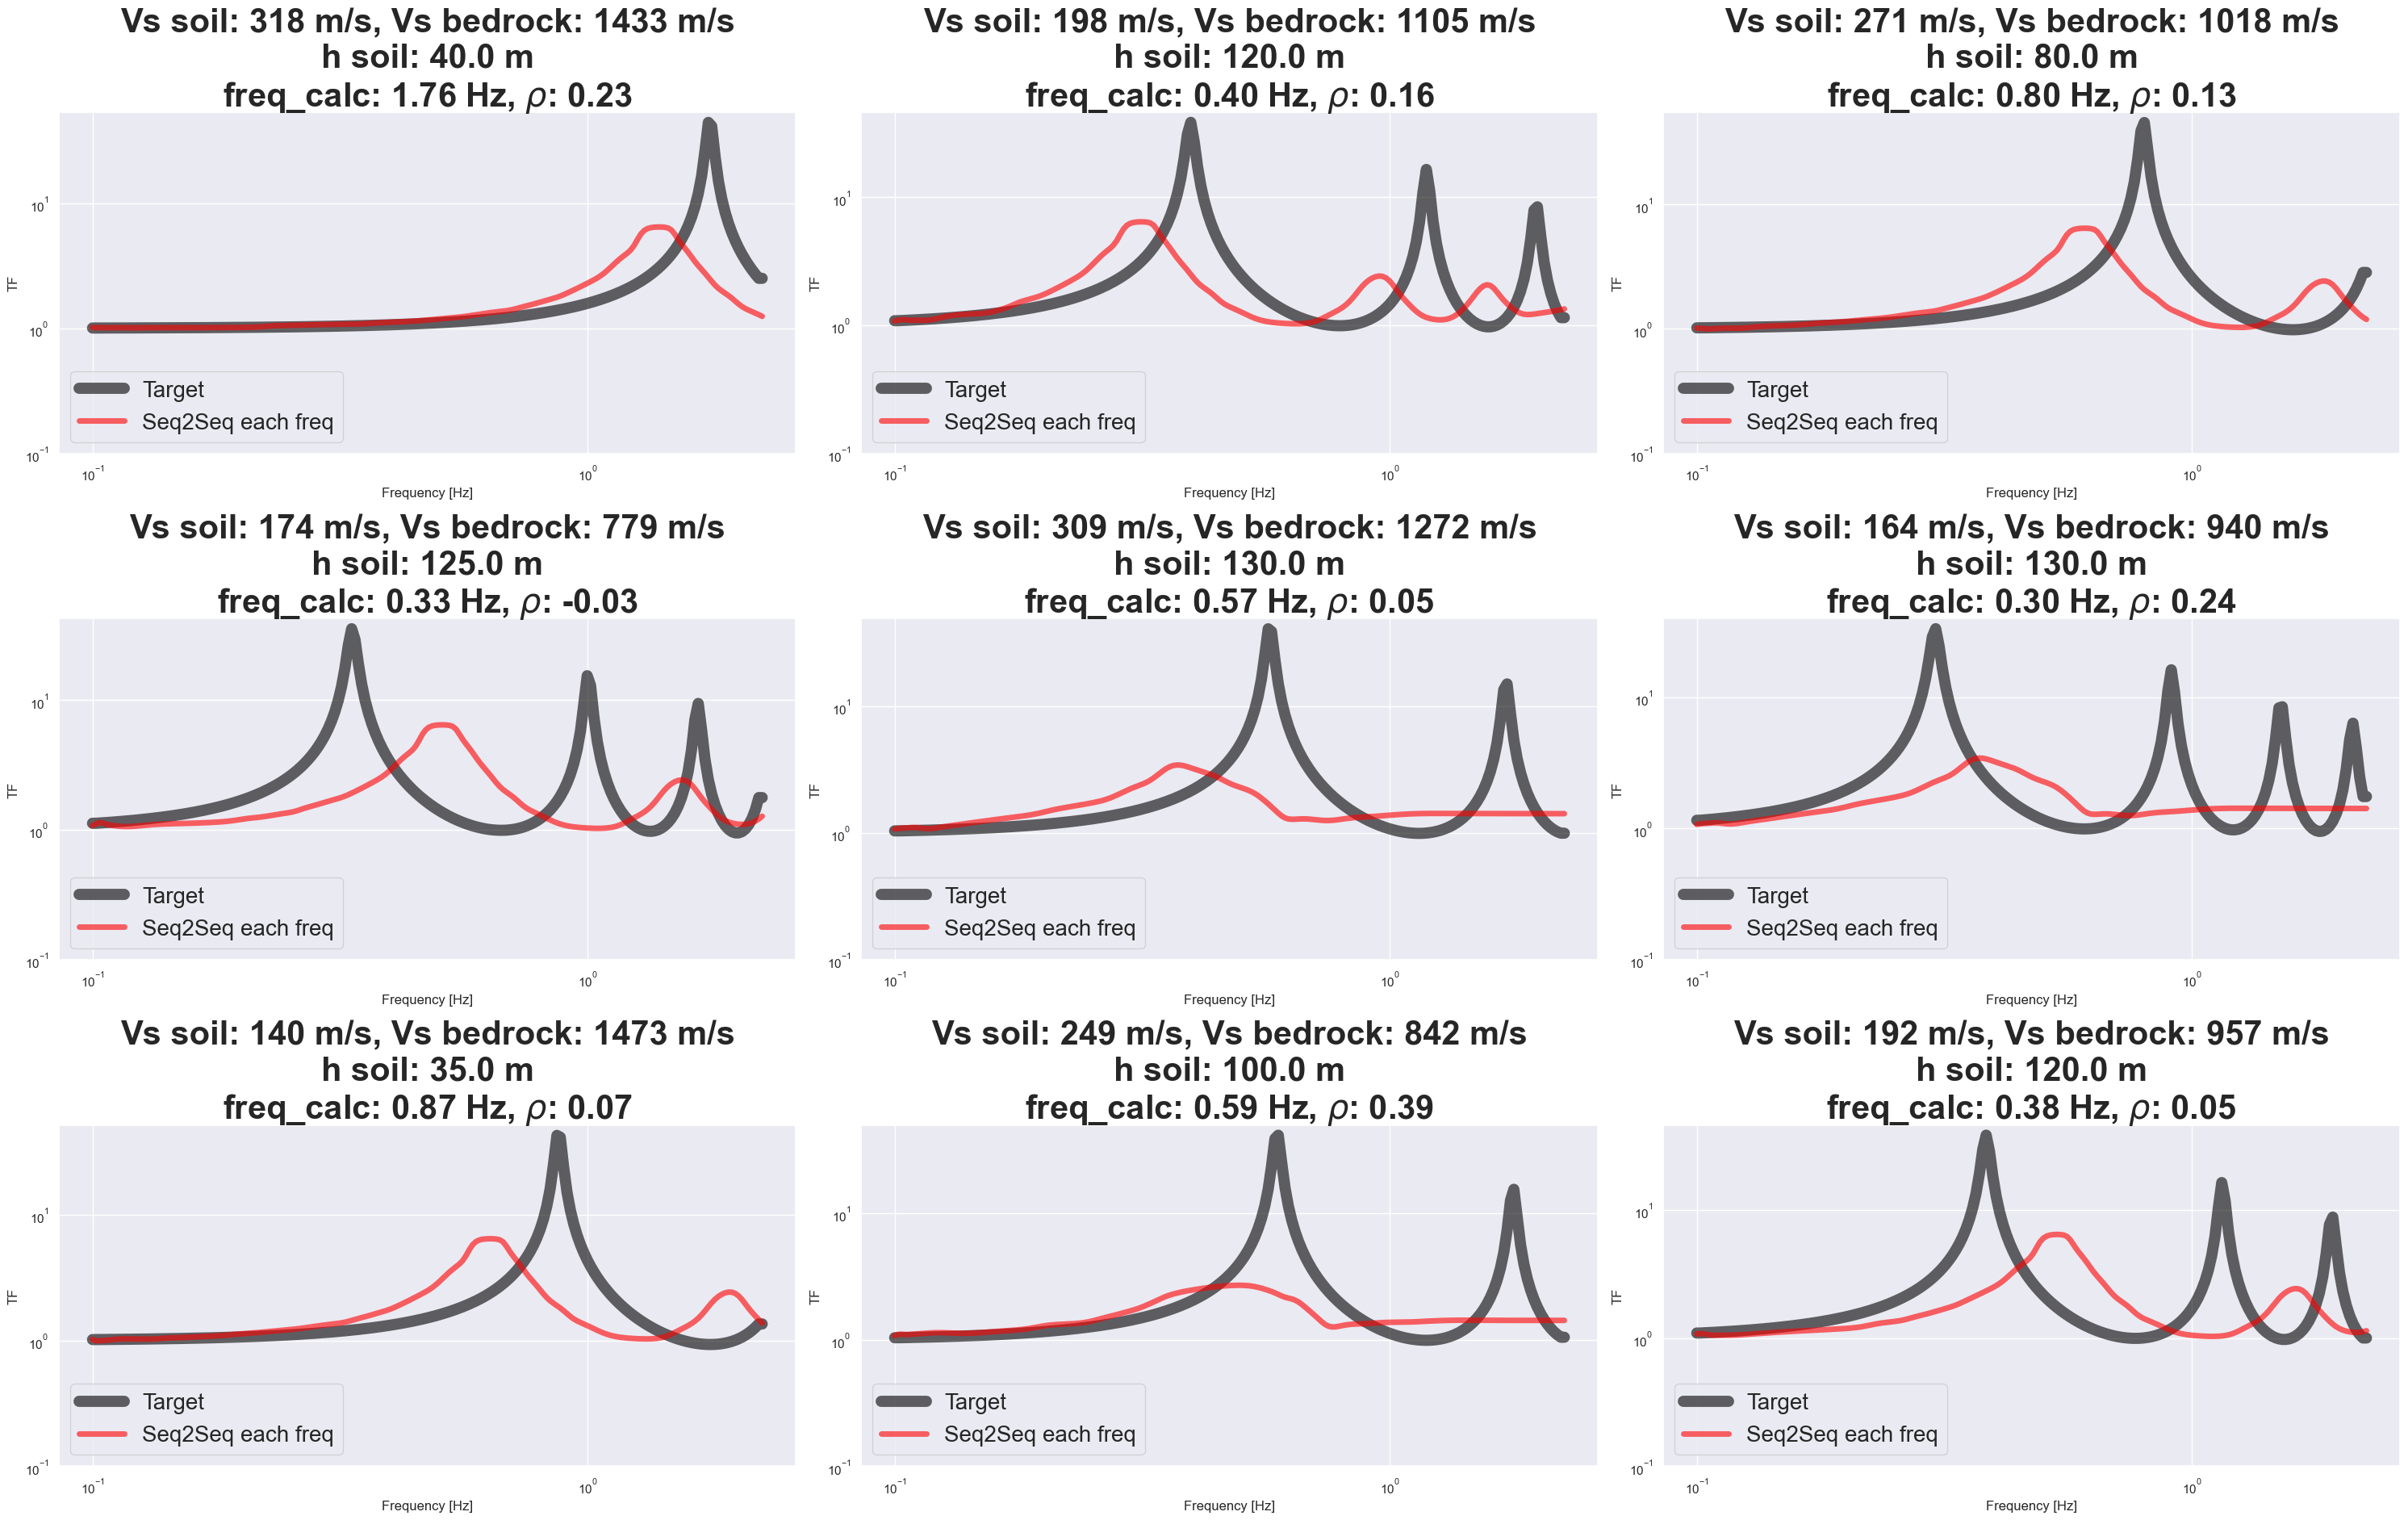

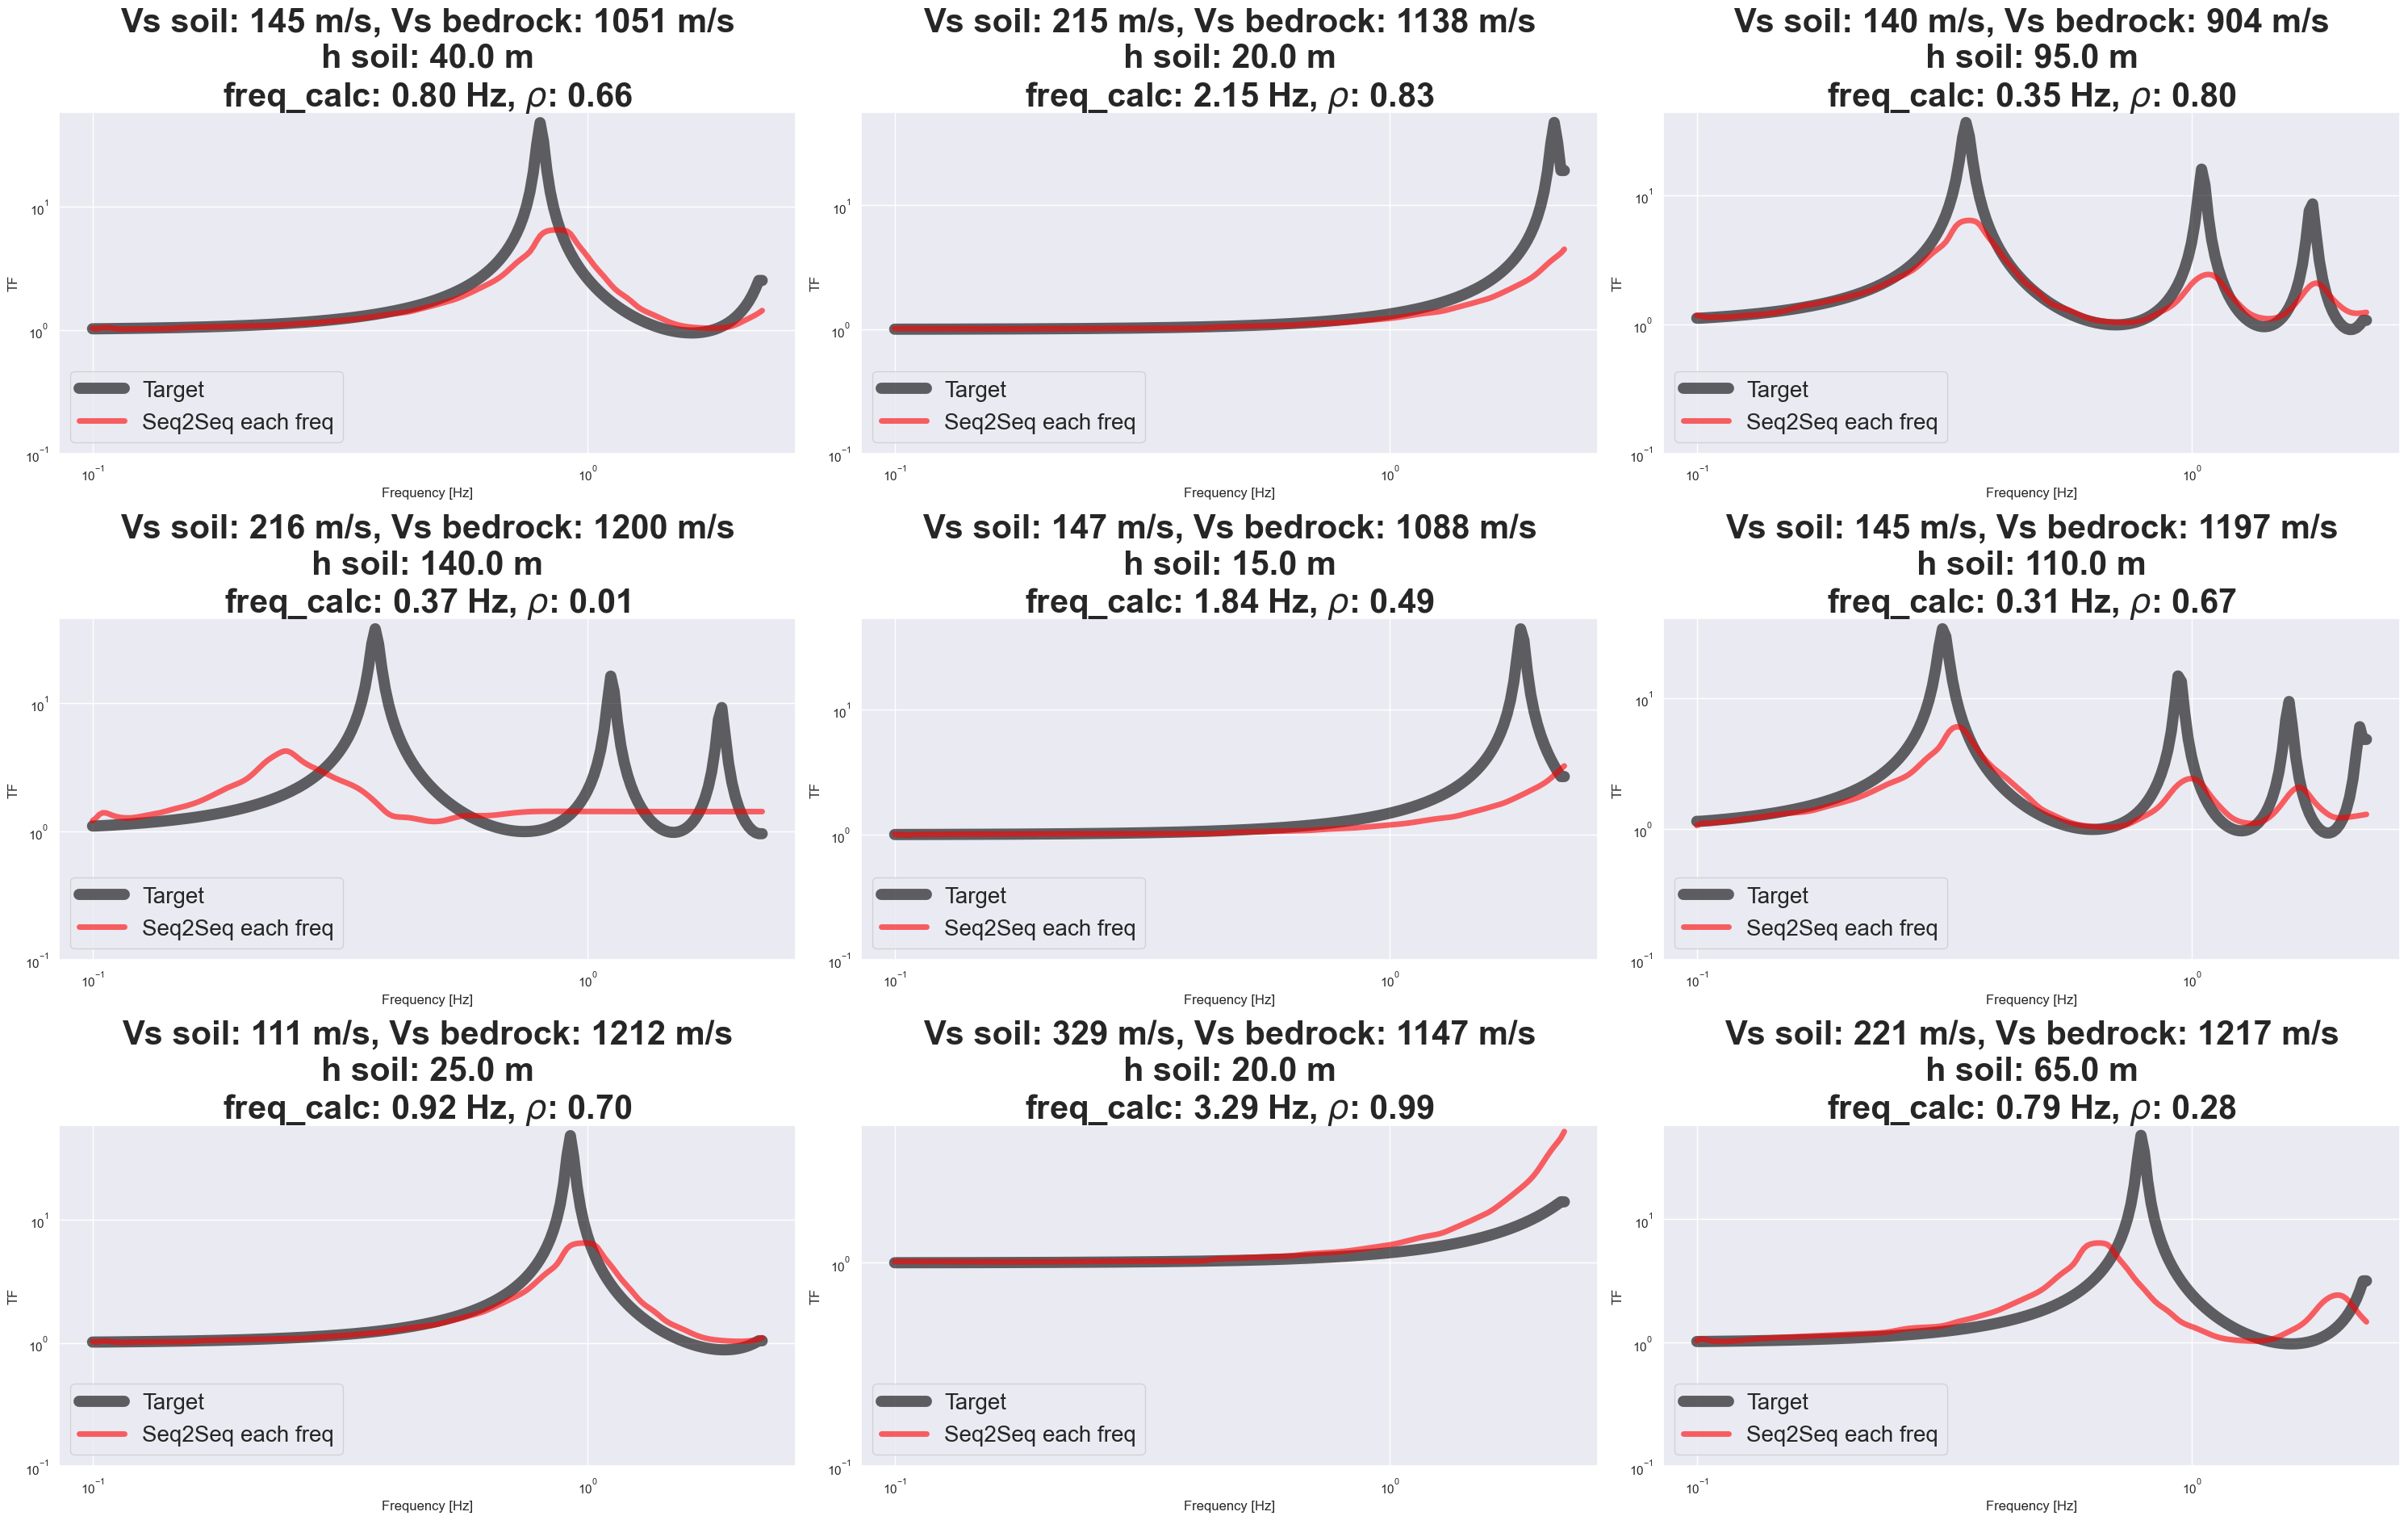

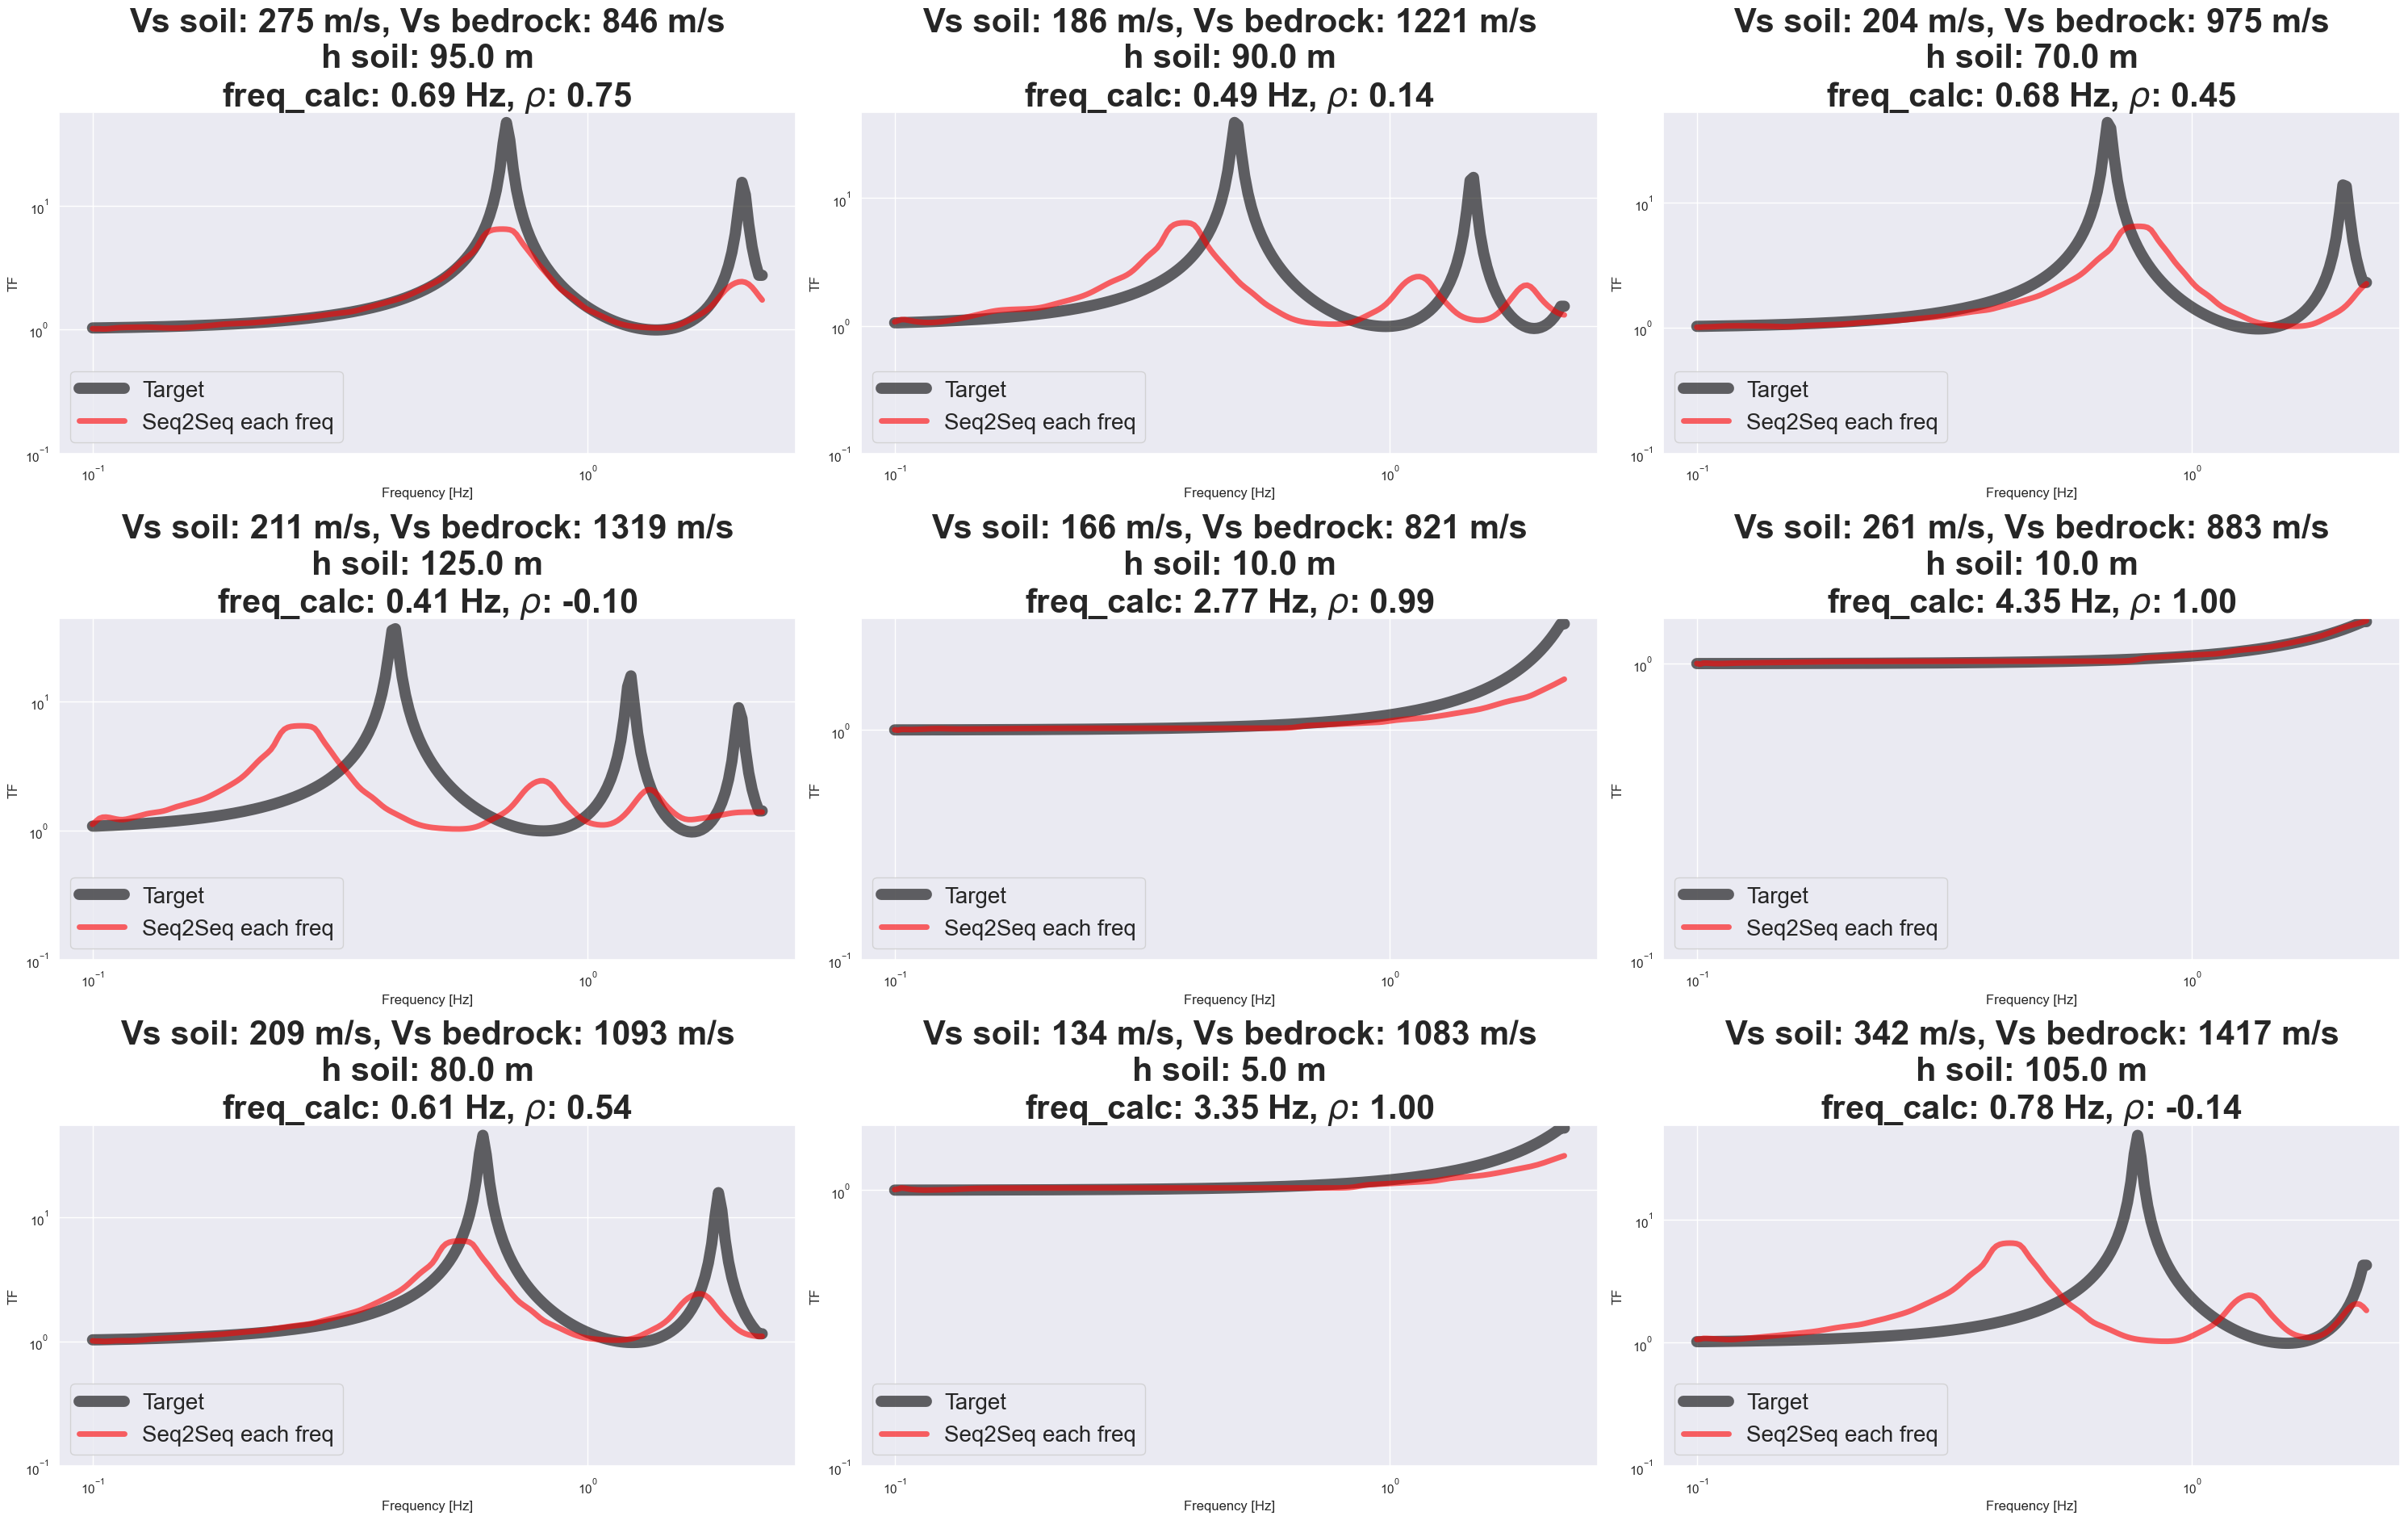

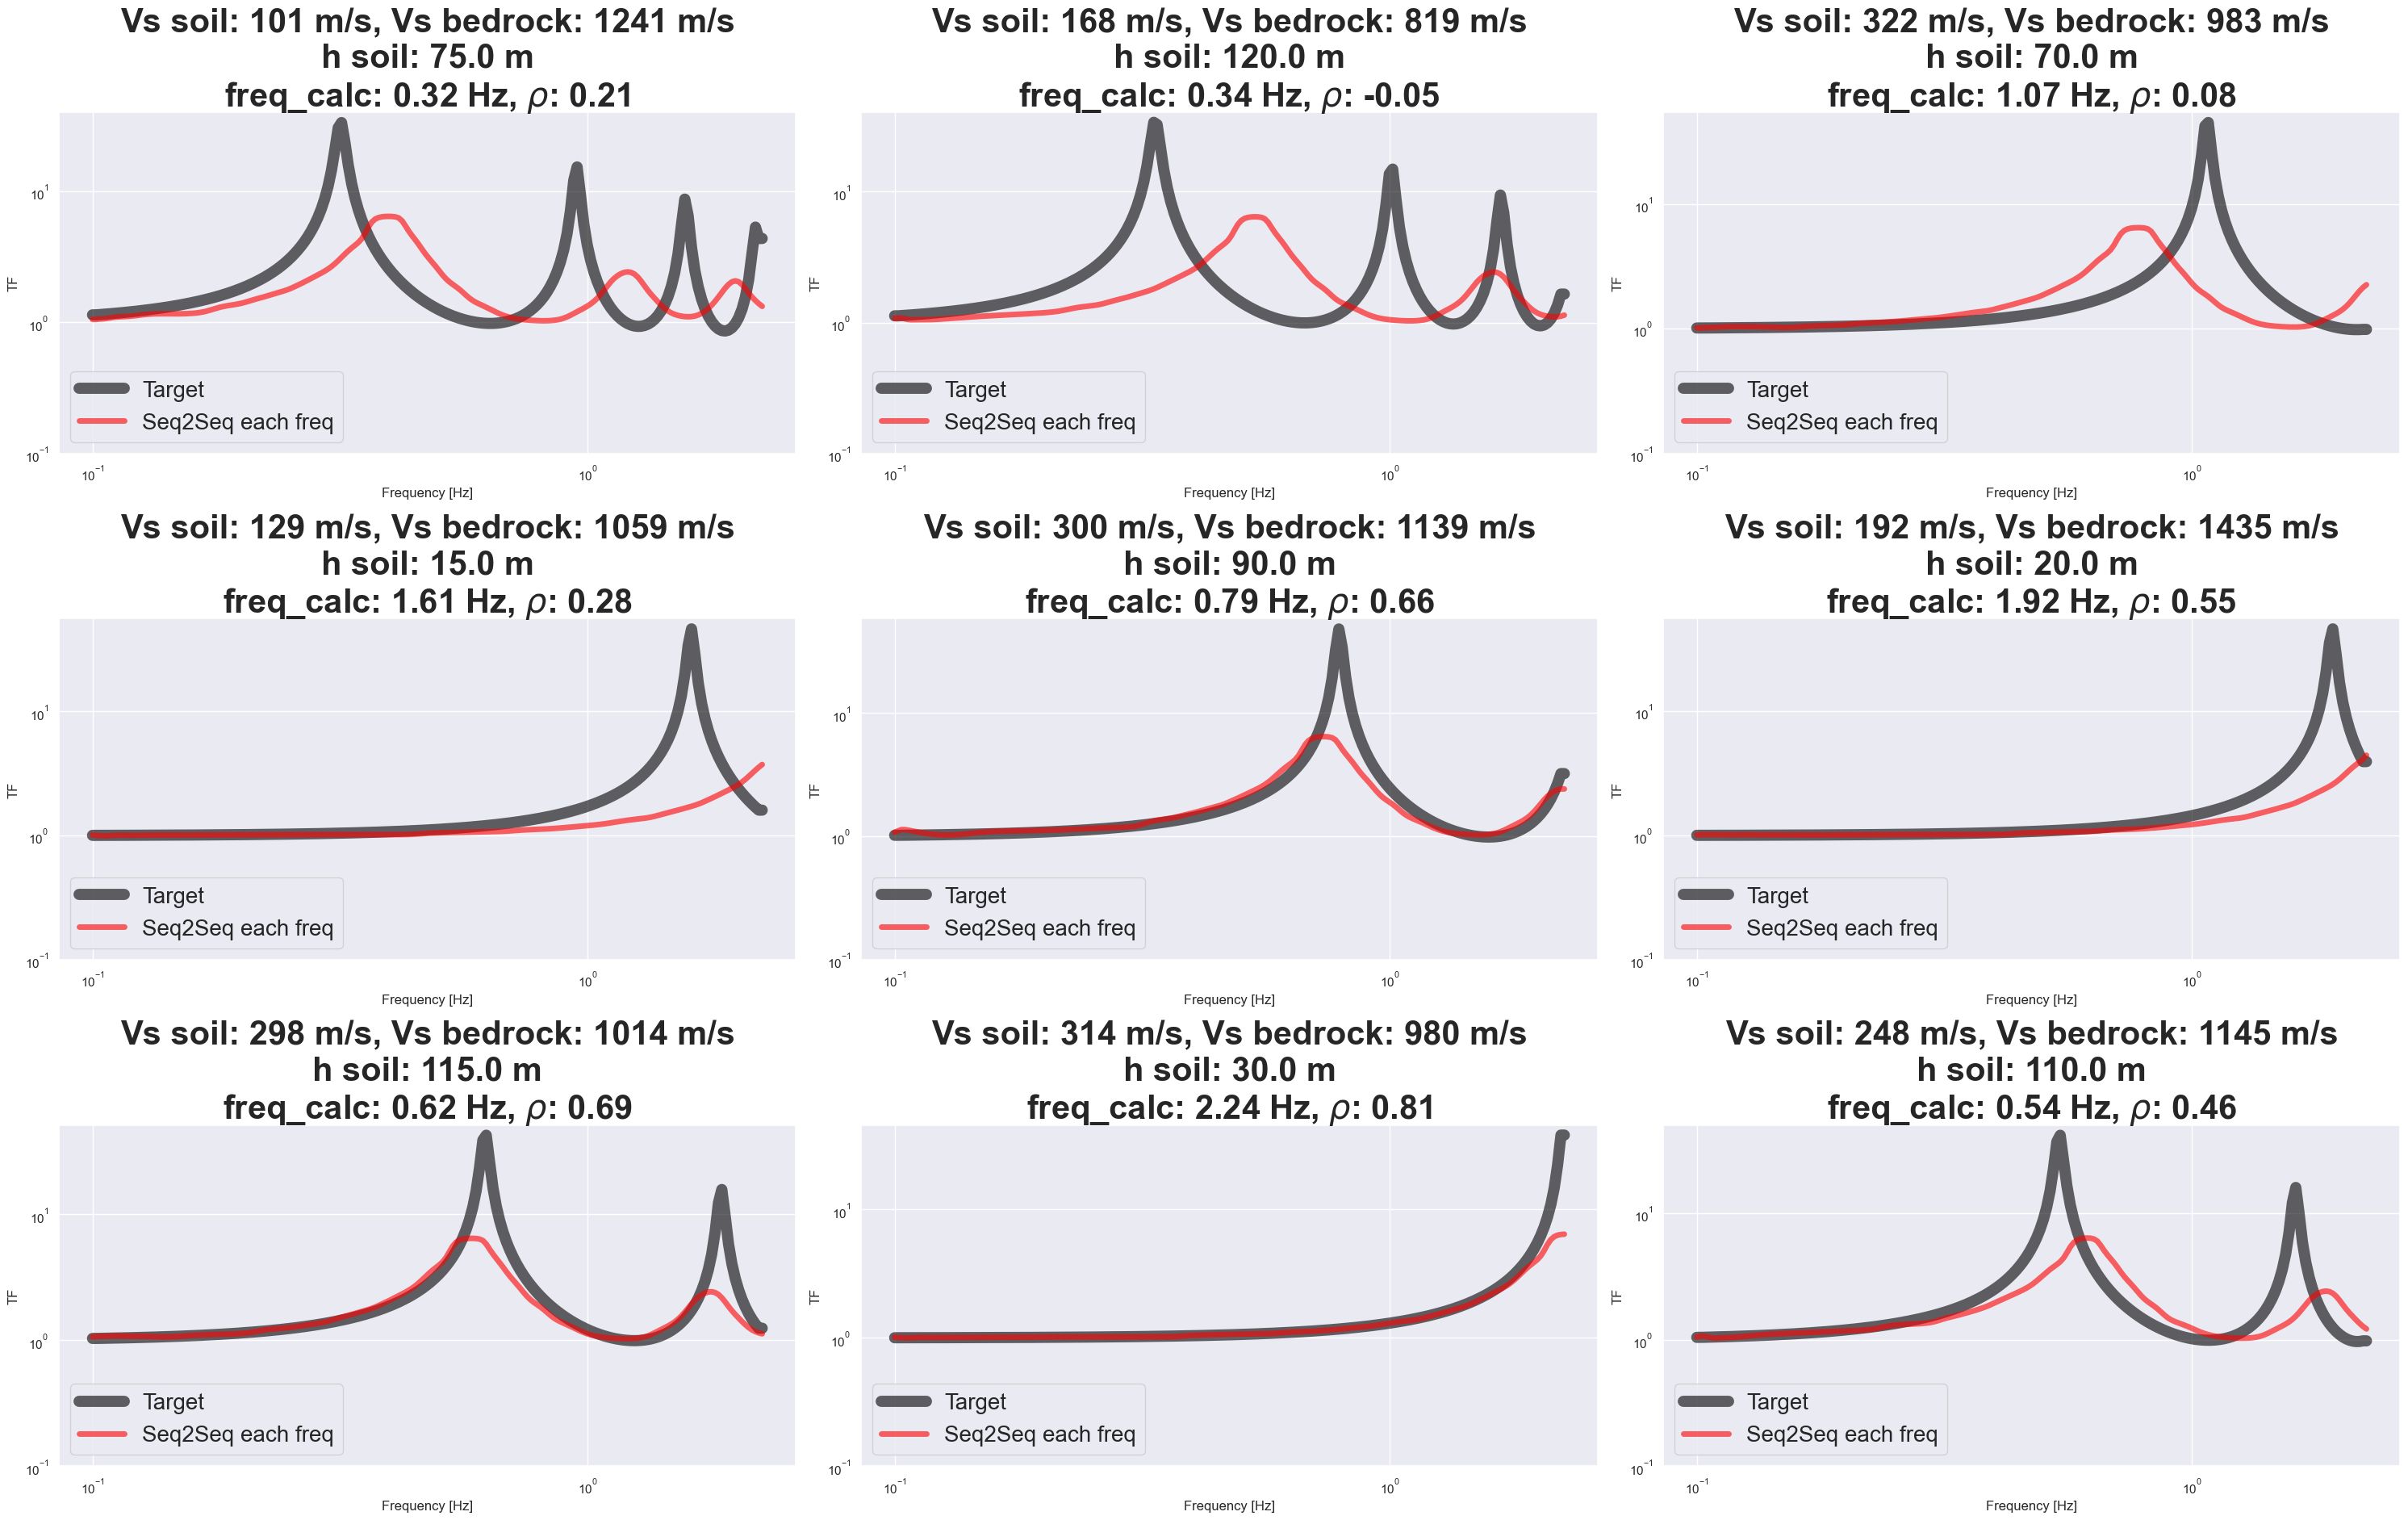

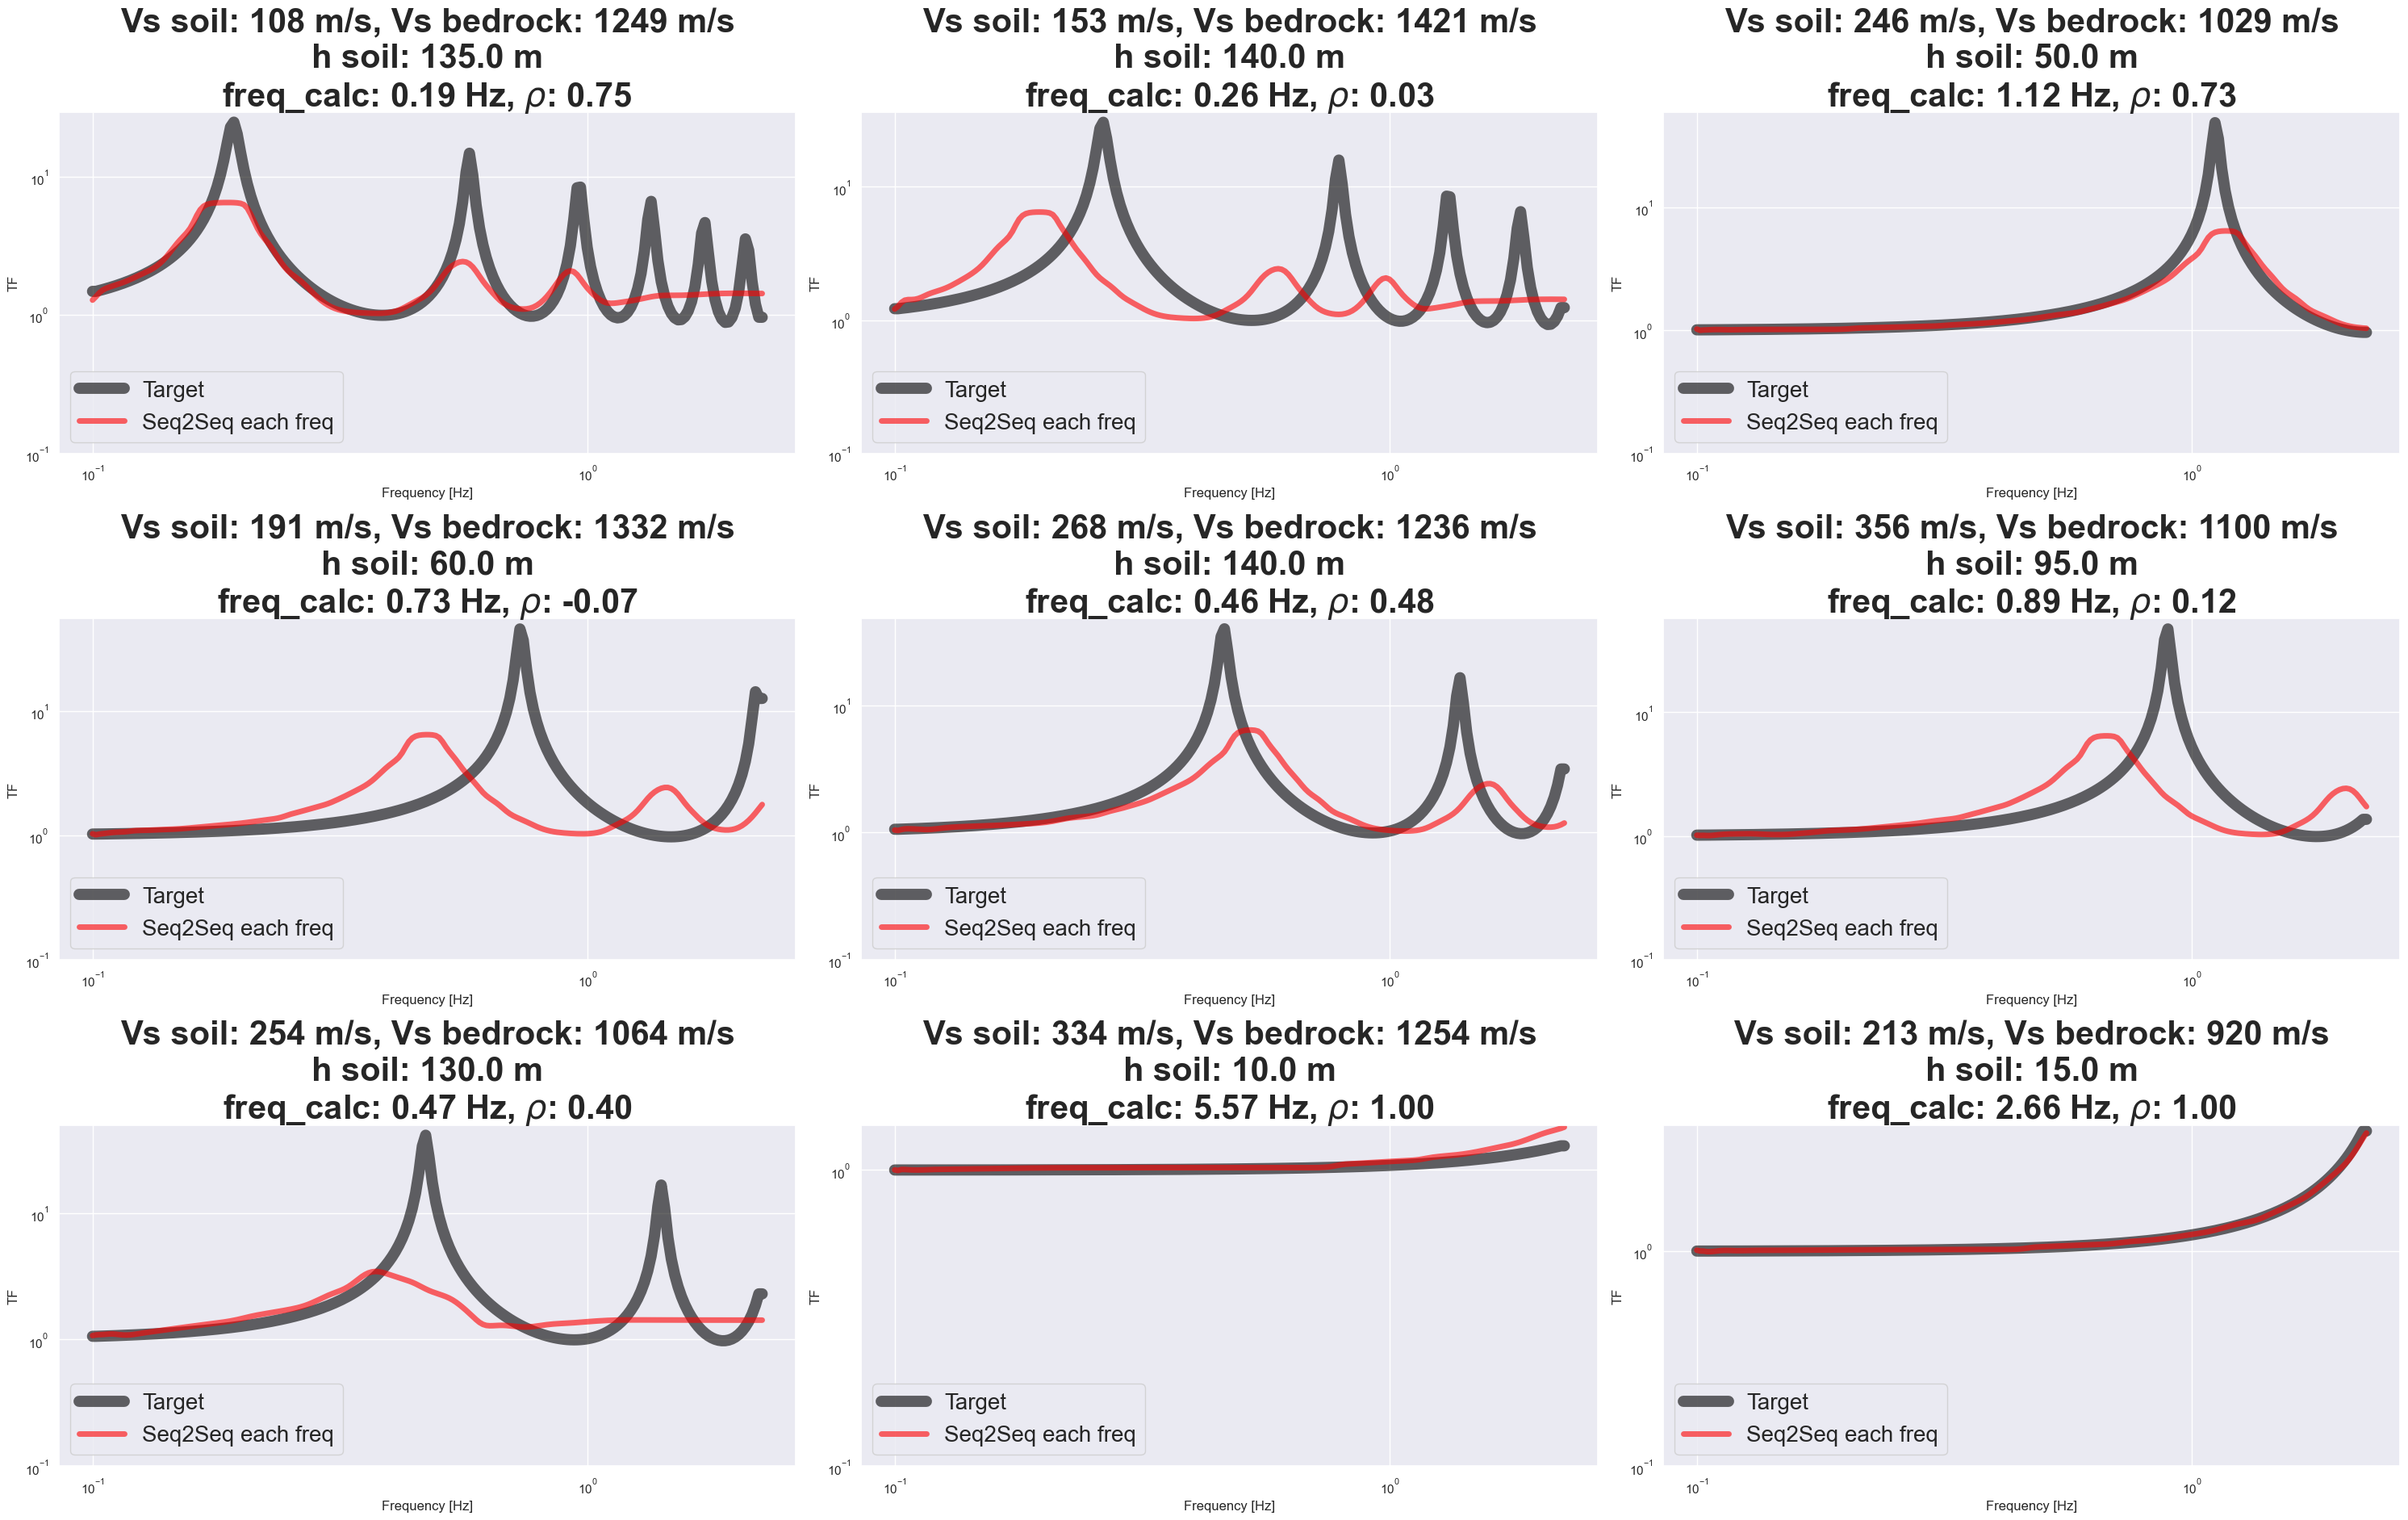

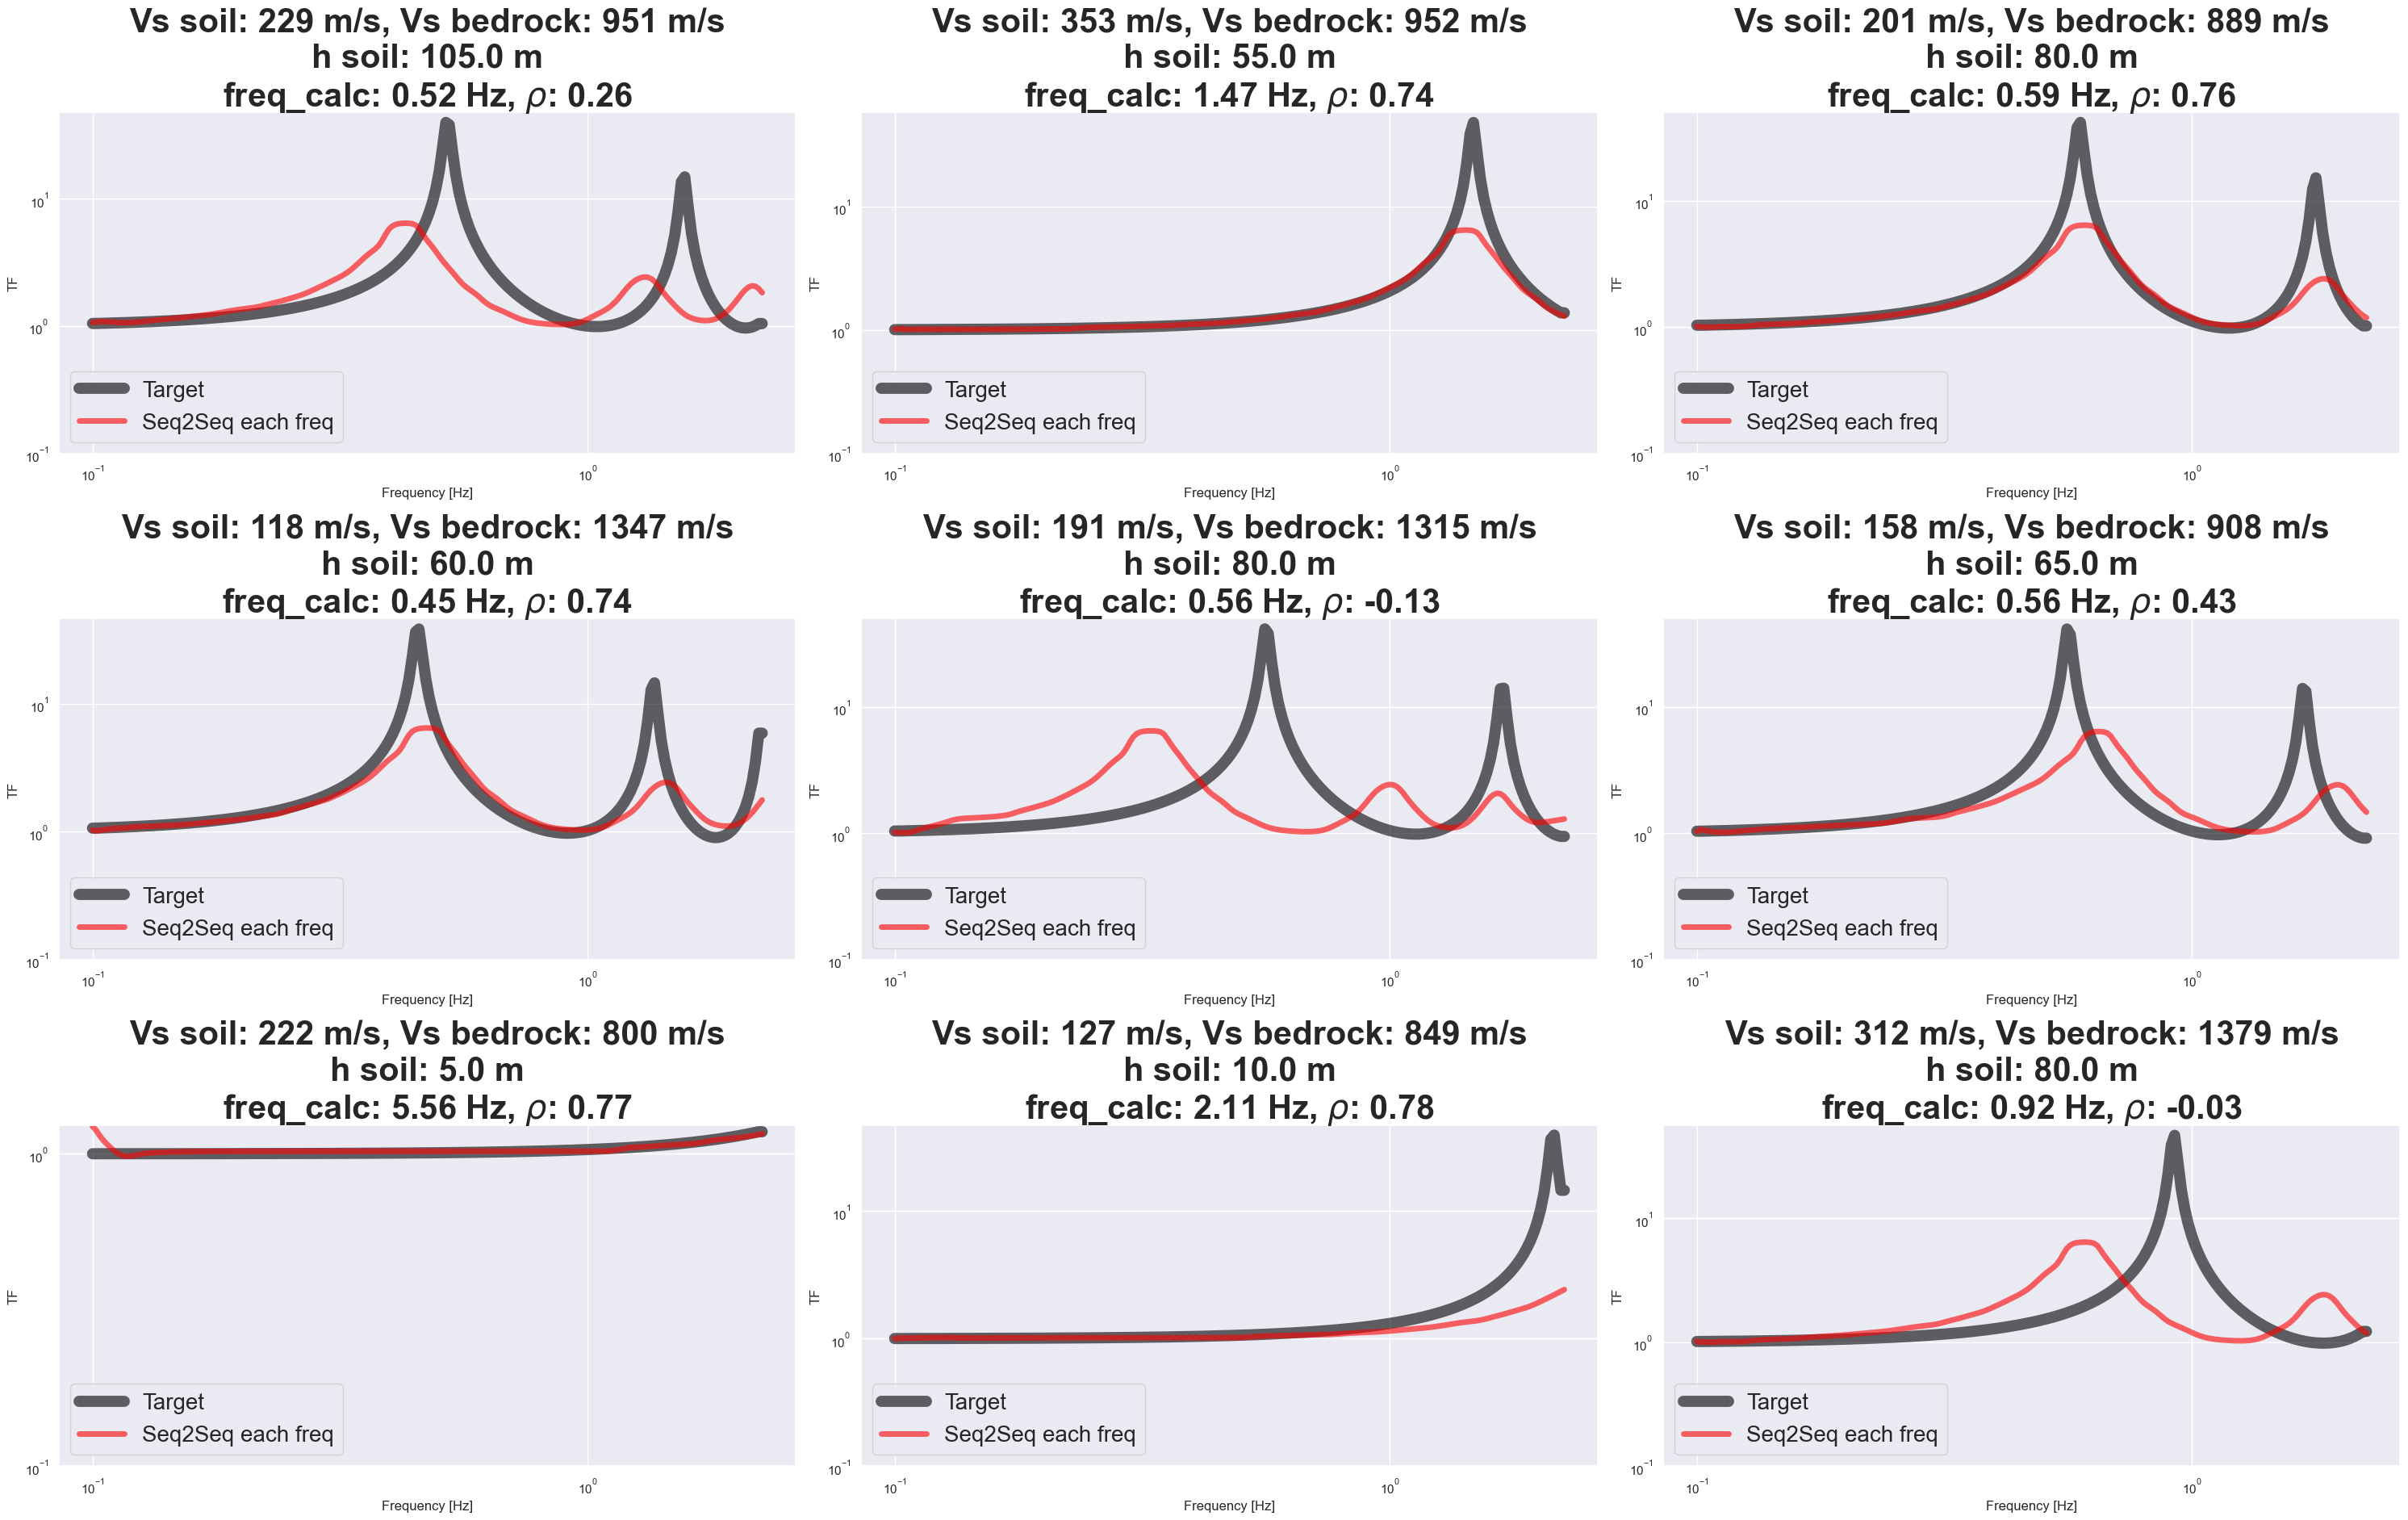

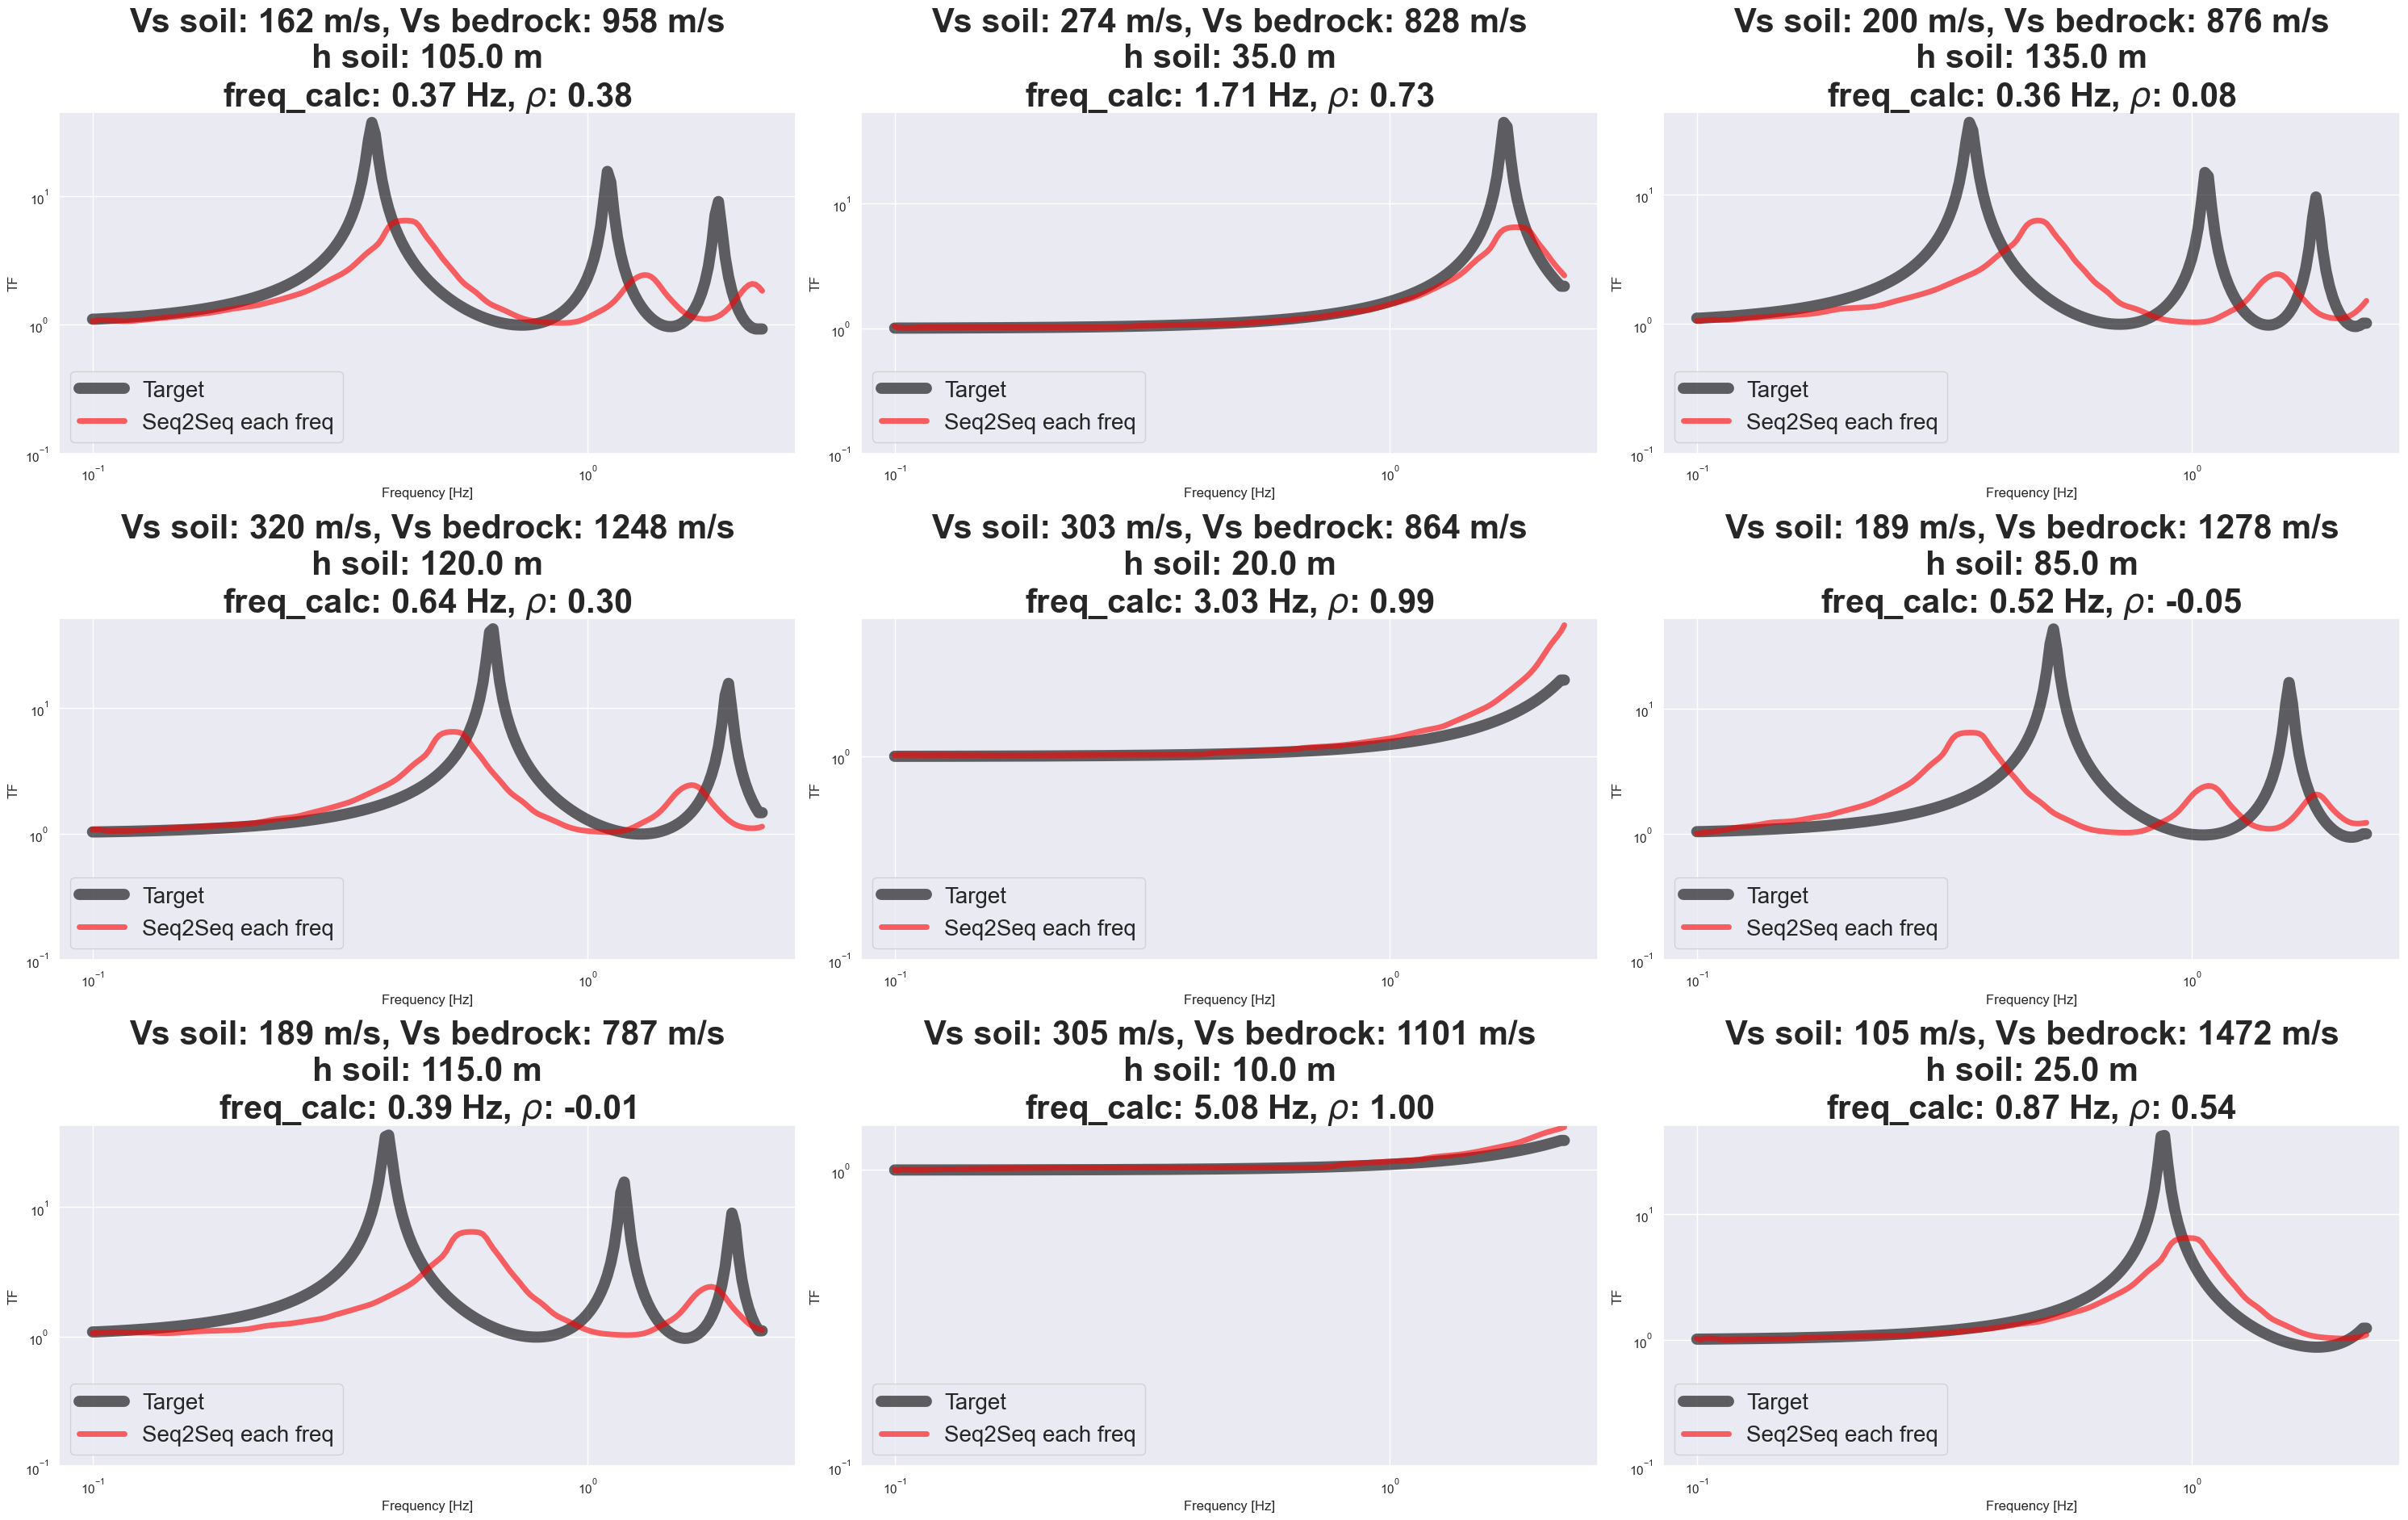

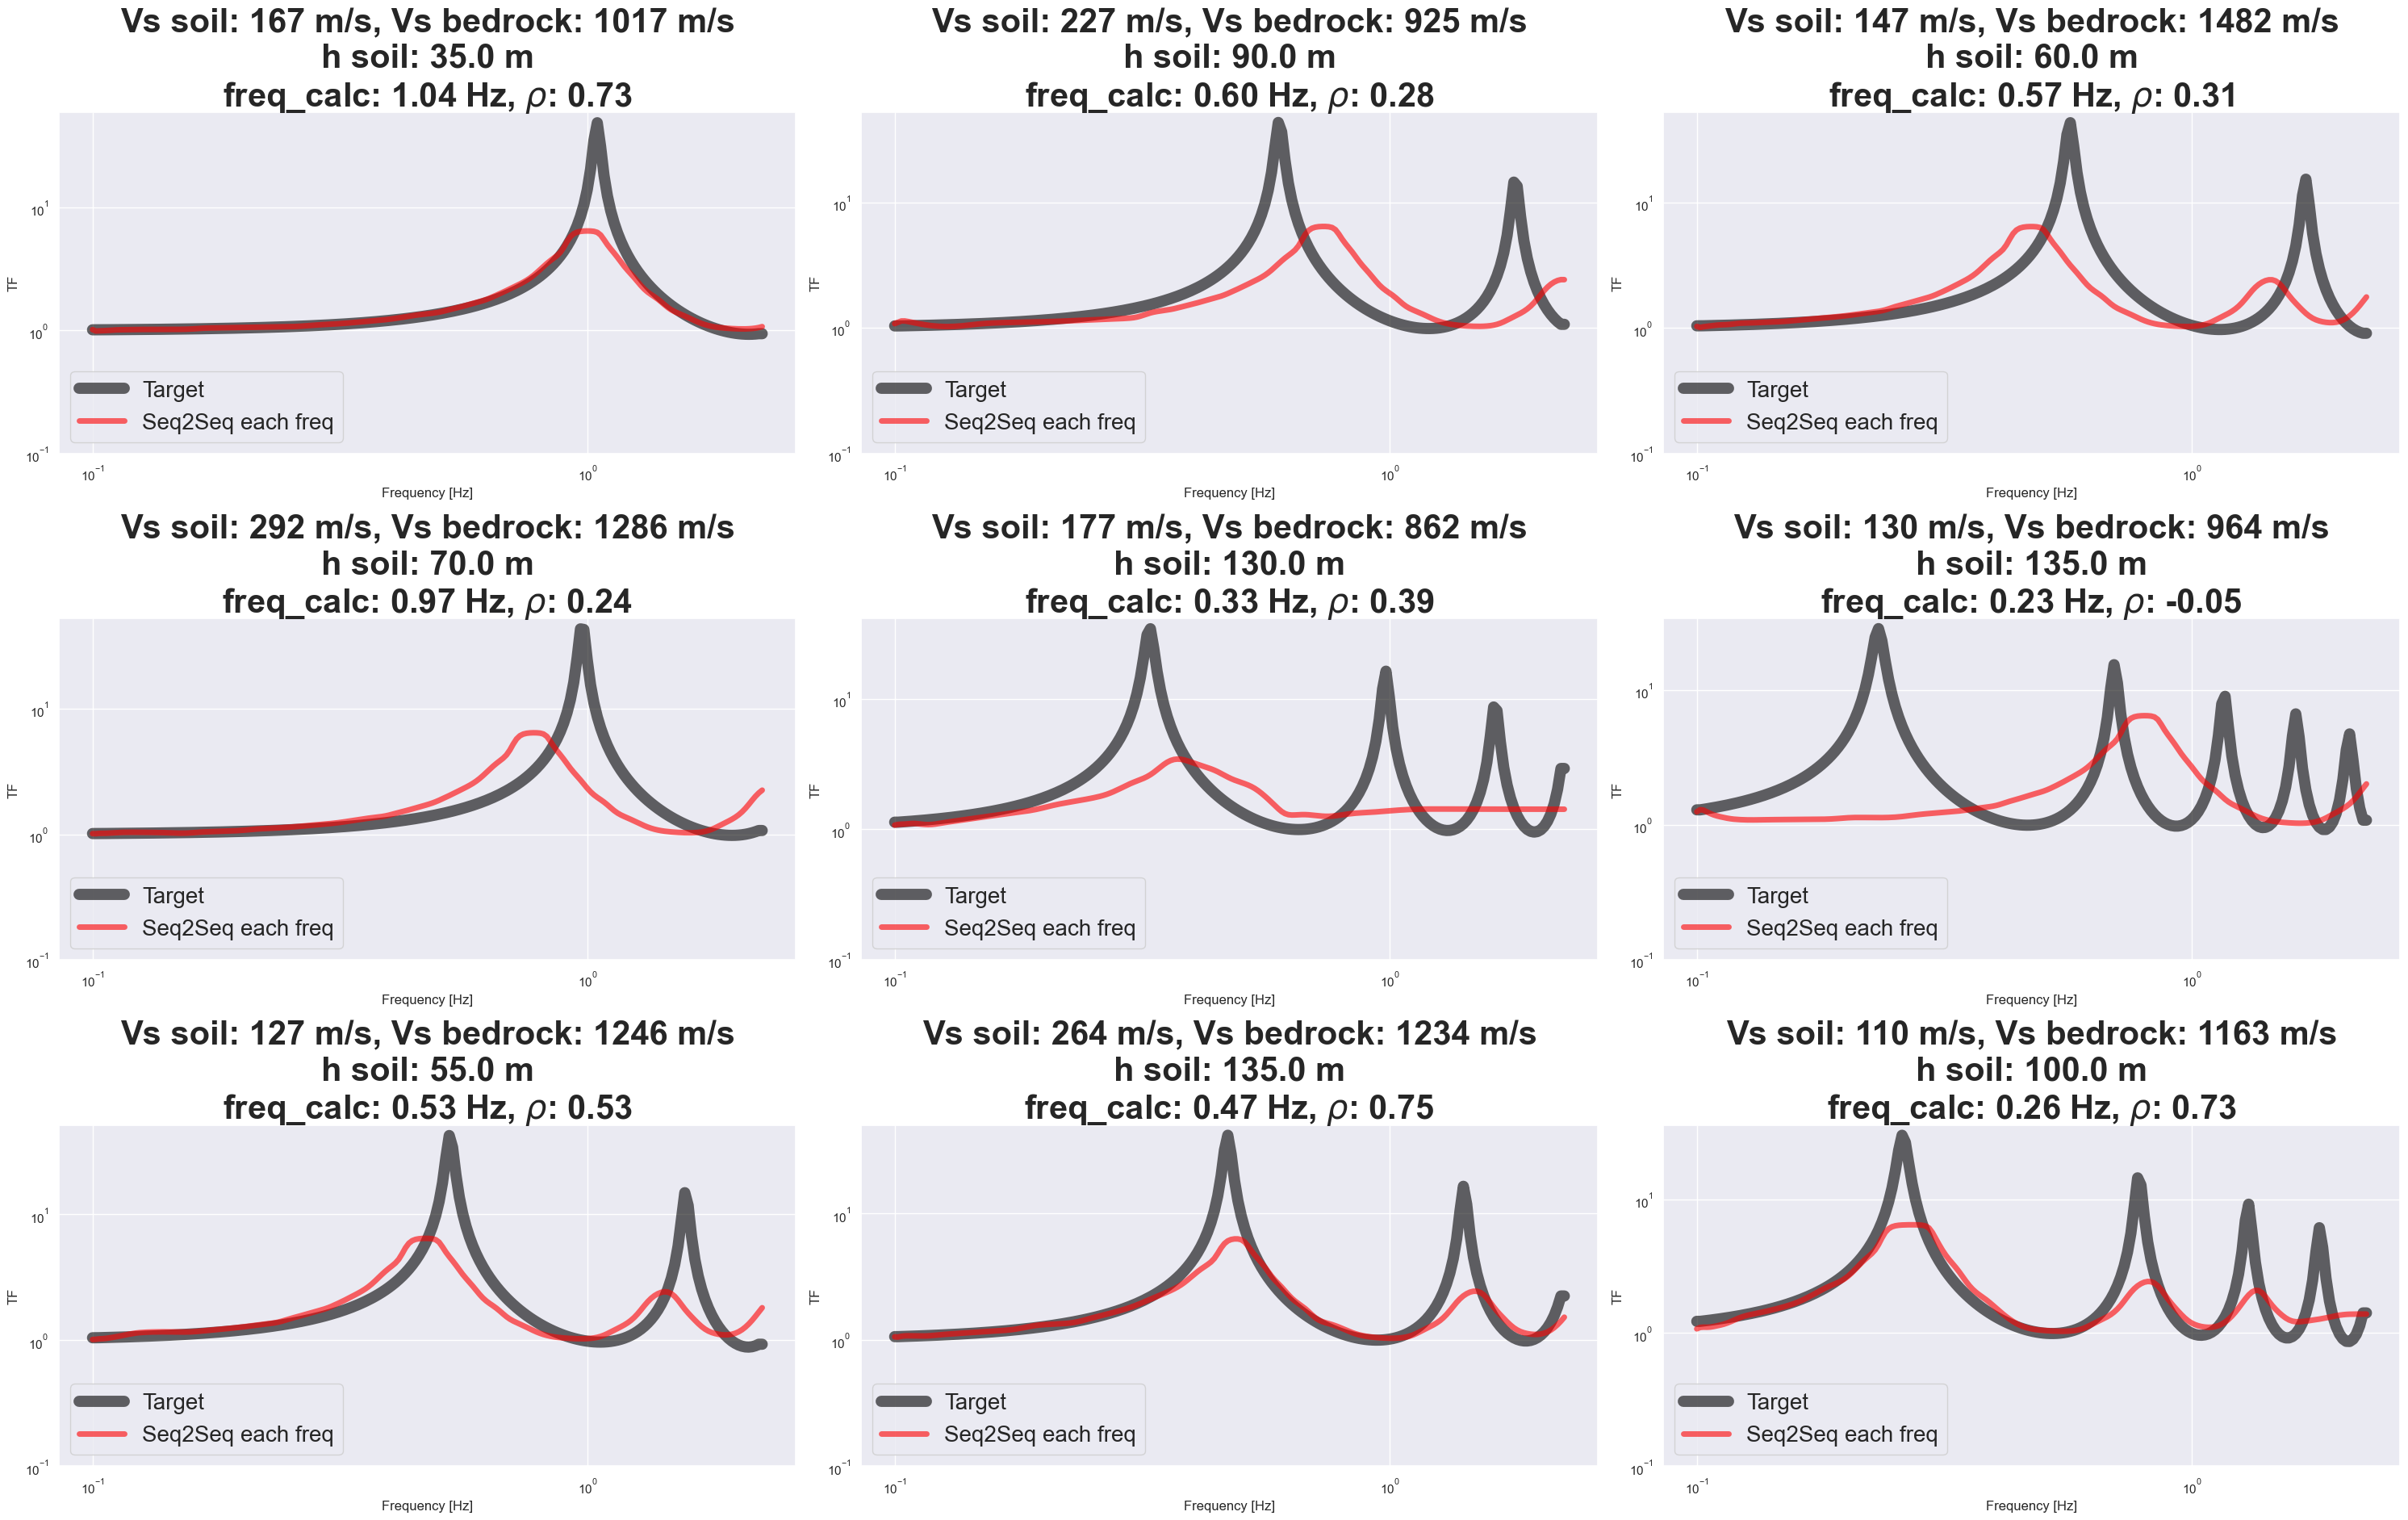

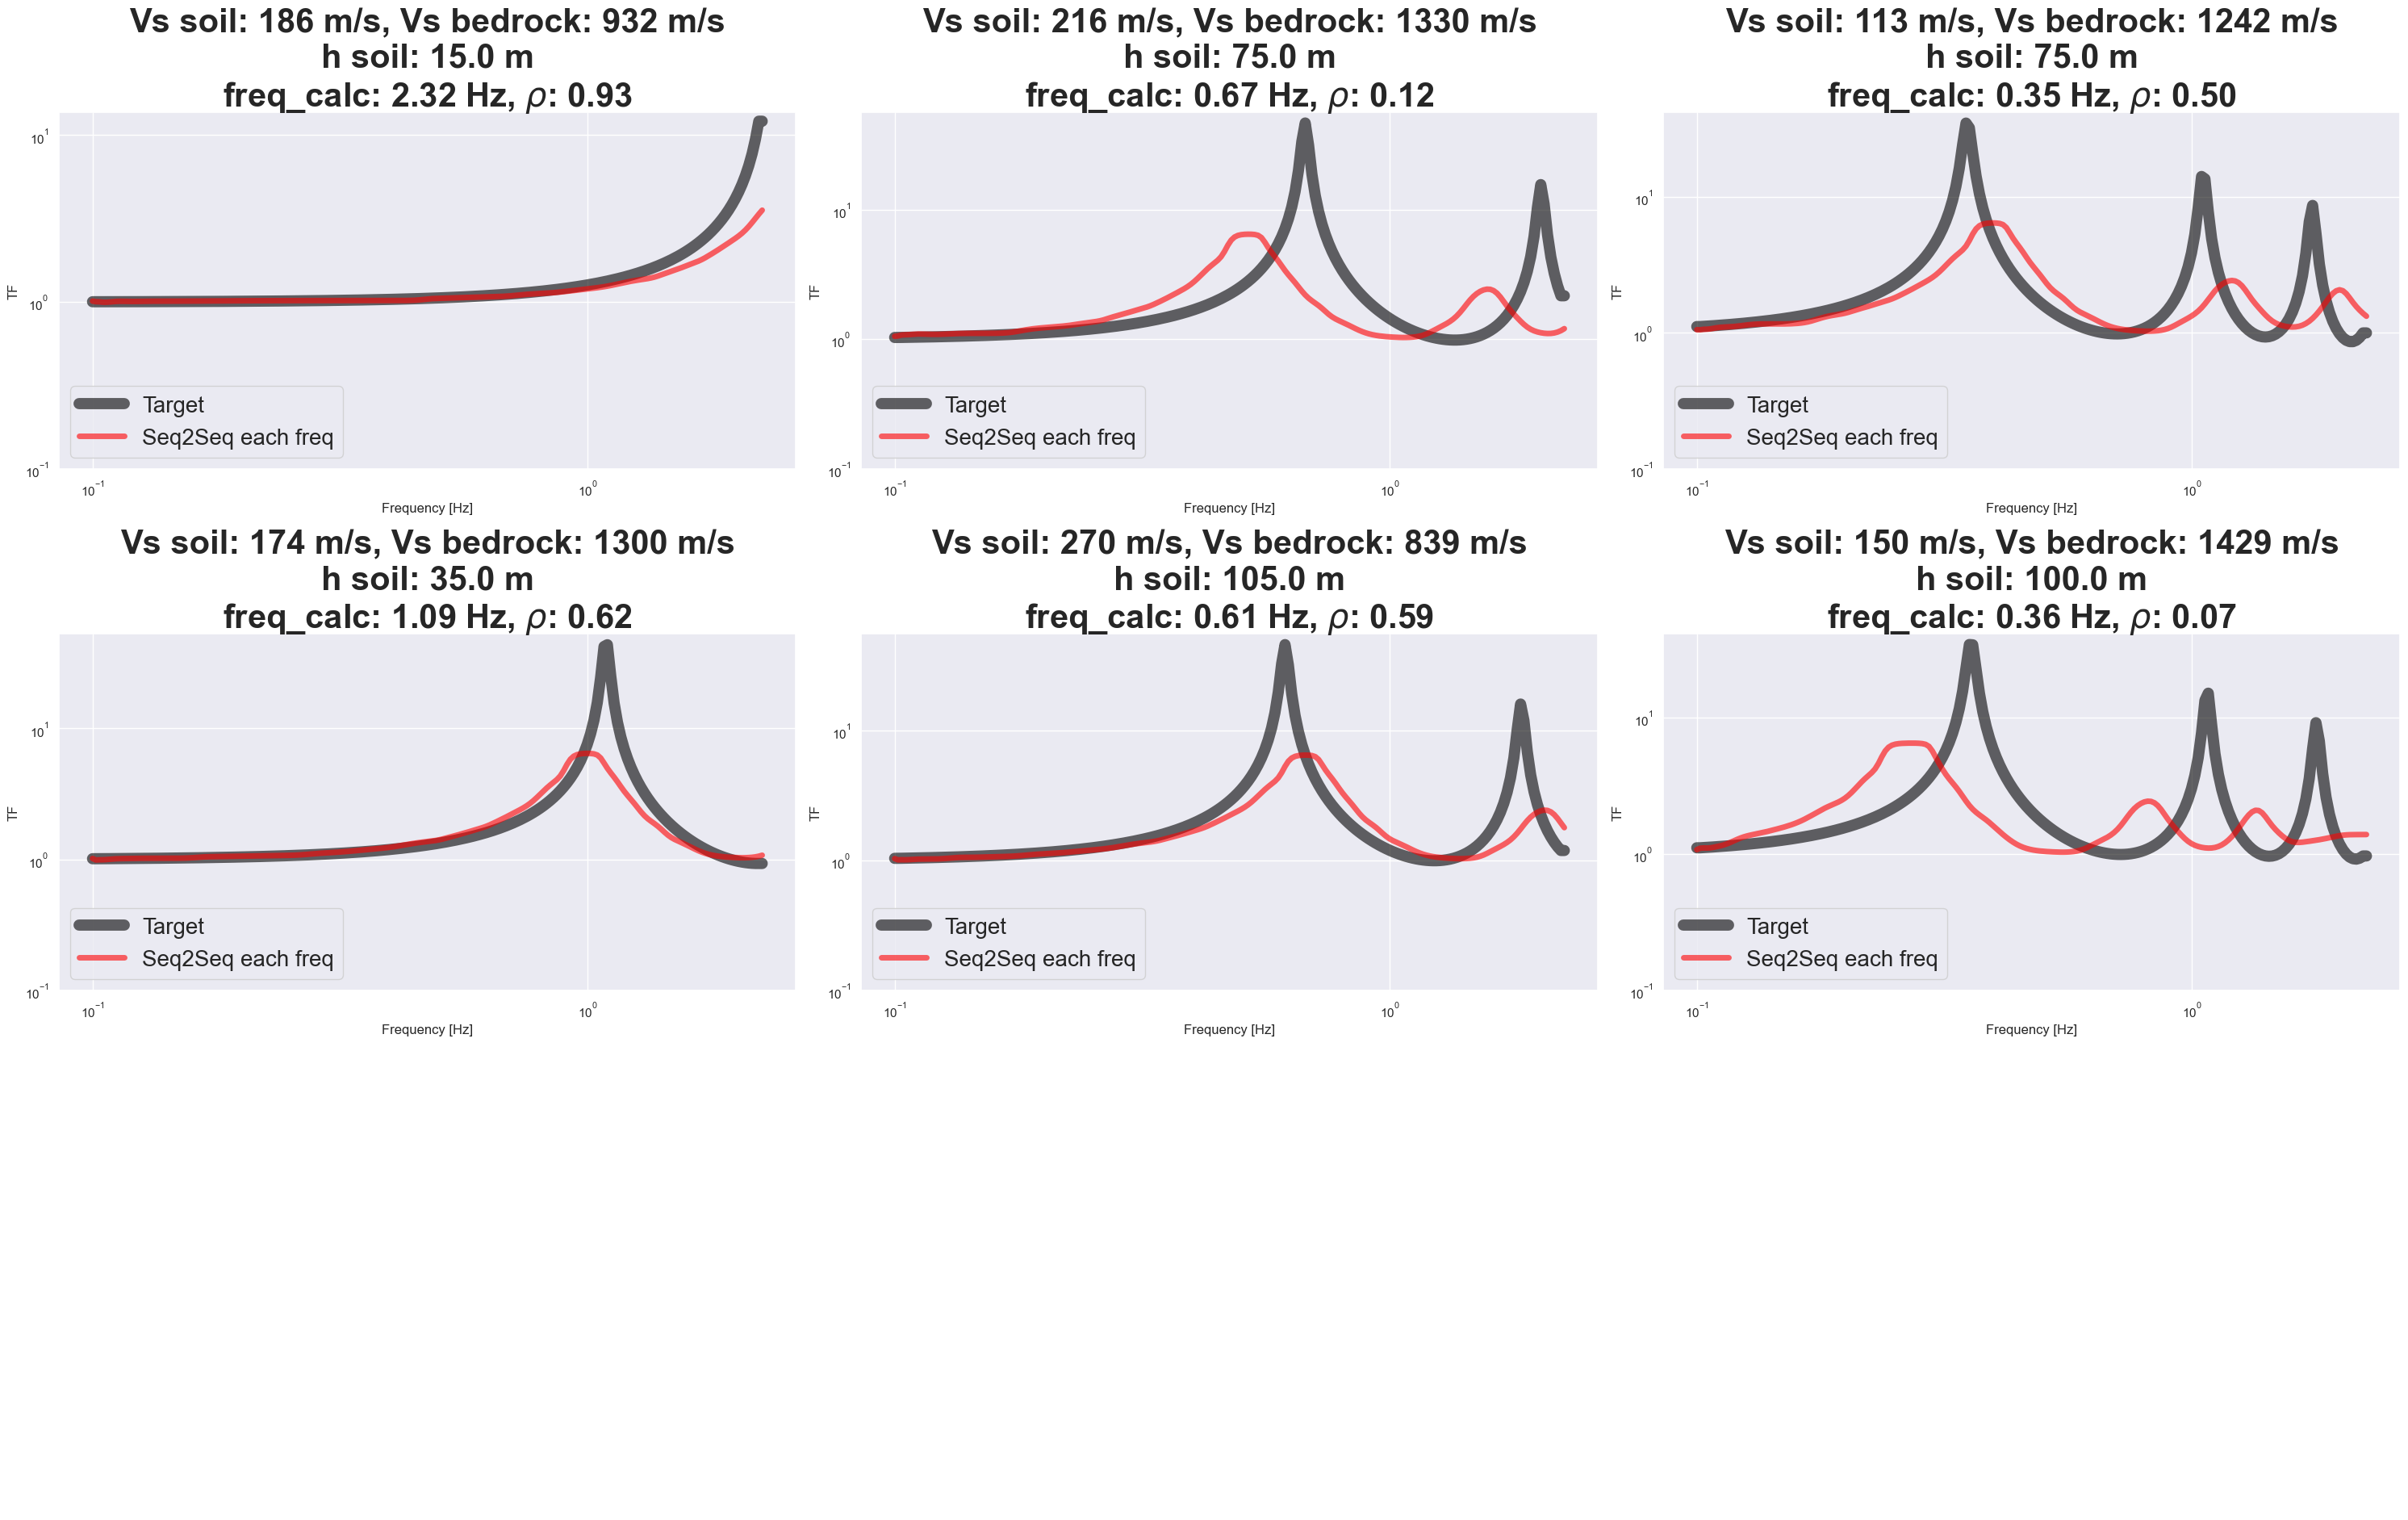

In [15]:
# Define number of plots
num_plots = df.shape[0]
num_rows, num_cols = 3, 3
plots_per_figure = num_rows * num_cols

for k in range(0, num_plots, plots_per_figure):
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(30, 20))
    #fig.suptitle("Comparison of TTF predictions", fontsize=40)

    for i in range(num_rows):
        for j in range(num_cols):
            index = k + i * num_cols + j
            if index >= num_plots:
                ax[i, j].axis('off')  # Turn off the axis if there's no data
                continue
        
            text = text_plot(df.iloc[index].values)
            line1, = ax[i, j].loglog(freq, TF_true[index, :], label="Target", linewidth=10, alpha=0.6, color="black")
            line2, = ax[i, j].loglog(freq, TF_predictions[index, :], label="Seq2Seq each freq", linewidth=5, alpha=0.6, color="red")
            ax[i, j].set_title(text, fontweight="bold", fontsize=30)
            ax[i, j].set_xlabel("Frequency [Hz]")
            ax[i, j].set_ylabel("TF")
            ax[i, j].set_ylim([1e-1, None])
            ax[i, j].legend(loc="lower left", fontsize=20)
           





    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()